In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.metrics import r2_score
from scipy.stats import pearsonr, spearmanr
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.patches as mpatches
from scipy.stats import ttest_ind, ttest_1samp, ttest_rel
import matplotlib as mpl

In [4]:
# mpl.rcParams['font.family'] = 'Avenir'
plt.rc('font', family='Helvetica')
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

In [5]:
ic50 = pd.read_csv("../data/drug/ic50_processed.csv")

In [6]:
def plot_best_params(df):
    fig, ax = plt.subplots((df.columns.size - 2) // 2 + 1,
                           2,
                           figsize=(15, 4 * ((df.columns.size - 2) // 2 + 1)))
    count = 0
    for col in df.columns:
        if col != 'Drug Id':
            if (df.columns.size - 1) <= 2:
                sns.countplot(df[col], ax=ax[count])
            else:
                sns.countplot(df[col], ax=ax[count // 2, count % 2])
            count += 1

In [7]:
ic50['sensitive'] = ic50['IC50_raw'] < ic50['Max conc']
ic50_sensitive_merge = pd.merge(
    ic50.groupby(['Drug Id']).size().reset_index(name='cell_line_count'),
    ic50.groupby(['Drug Id'
                  ])['sensitive'].sum().reset_index(name='sensitive_count'))
ic50_sensitive_merge['sensitive_ratio'] = ic50_sensitive_merge[
    'sensitive_count'] / ic50_sensitive_merge['cell_line_count']

# RUV Zero

## min 900 cell lines

In [165]:
scores_en_tissue = pd.read_csv(
    "../work_dirs/meta_info/tissue_ic50/ElasticNet/scores_202004032104_900.csv"
)
scores_rf_tissue = pd.read_csv(
    "../work_dirs/meta_info/tissue_ic50/RandomForest/scores_202004041845_900.csv"
)

scores_en_rna = pd.read_csv(
    "../work_dirs/rna_norm/ElasticNet/scores_202004032156_rna_900.csv")
scores_svm_rna = pd.read_csv(
    "../work_dirs/rna_norm/SVM/scores_202004071606_rna_900.csv")
scores_rf_rna = pd.read_csv(
    "../work_dirs/rna_norm/RandomForest/scores_202004071545_rna_900.csv")
scores_rf_rna_common = pd.read_csv(
    "../work_dirs/rna_common_norm/RandomForest/scores_202004081136_rna_900.csv"
)
scores_rf_rna_common_comp = pd.read_csv(
    "../work_dirs/rna_common_comp_norm/RandomForest/scores_202004151103_rna_900.csv"
)

scores_en_protein = pd.read_csv(
    "../work_dirs/protein_norm/ElasticNet/scores_202004032215_ruv_zero_900.csv"
)
scores_svm_protein = pd.read_csv(
    "../work_dirs/protein_norm/SVM/scores_202004032216_ruv_zero_900.csv")
scores_rf_protein = pd.read_csv(
    "../work_dirs/protein_norm/RandomForest/scores_202004032212_ruv_zero_900.csv"
)

In [168]:
print(scores_en_tissue['test_corr'].median())
print(scores_rf_tissue['test_corr'].median())

print(scores_en_rna['test_corr'].median())
print(scores_svm_rna['test_corr'].median())
print(scores_rf_rna['test_corr'].median())
print(scores_rf_rna_common['test_corr'].median())
print(scores_rf_rna_common_comp['test_corr'].median())

print(scores_en_protein['test_corr'].median())
print(scores_svm_protein['test_corr'].median())
print(scores_rf_protein['test_corr'].median())


0.44475348761567035
0.39631831454697075
0.4802225634322052
0.48590220987312305
0.5208765408258241
0.5100573229919223
0.5220601458044585
0.3700552610149993
0.4905323824776545
0.5111997678308389


RNA common comp 900: 0.47990990591846594

In [169]:
scores_en_rna[scores_en_rna.isnull().any(axis=1)]

Empty DataFrame
Columns: [Drug Id, val_score, test_mae, test_rmse, test_r2, test_corr, cv0_corr, cv1_corr, cv2_corr, cv3_corr, cv4_corr]
Index: []

In [170]:
scores_multi_protein = pd.read_csv(
    "../work_dirs/protein_norm/MultiDrug/scores_202004031435_resx_ruv_mv_900.csv"
)


scores_multi_protein_norm_test = scores_multi_protein[
    scores_multi_protein['run'] == 'test'].reset_index(drop=True)

max_epoch = scores_multi_protein_norm_test.groupby(['epoch']).median()['corr'].reset_index()

print(max_epoch[max_epoch['corr']==max_epoch['corr'].max()])
scores_multi_protein_norm_test[scores_multi_protein_norm_test['epoch']==130]['corr'].median()

     epoch  corr
128    129  0.53


0.5264817159974322

In [171]:
multi_res = scores_multi_protein_norm_test[scores_multi_protein_norm_test['epoch']==130][['Drug Id', 'corr']]
multi_res['Model'] = 'Protein MultiDrugNN'

## min 300

In [330]:
scores_en_tissue = pd.read_csv("../work_dirs/meta_info/tissue_ic50/ElasticNet/scores_202004032127_300.csv")

scores_en_rna = pd.read_csv("../work_dirs/rna_norm/ElasticNet/scores_202004032156_rna_300.csv")
scores_svm_rna = pd.read_csv("../work_dirs/rna_norm/SVM/scores_202004071607_rna_300.csv")
scores_rf_rna = pd.read_csv("../work_dirs/rna_norm/RandomForest/scores_202004071545_rna_300.csv")
scores_rf_rna_common = pd.read_csv("../work_dirs/rna_common_norm/RandomForest/scores_202004081135_rna_300.csv")
scores_rf_rna_common_comp = pd.read_csv(
    "../work_dirs/rna_common_comp_norm/RandomForest/scores_202004151102_rna_300.csv"
)

scores_en_protein = pd.read_csv("../work_dirs/protein_norm/ElasticNet/scores_202004032214_ruv_zero_300.csv")
scores_svm_protein = pd.read_csv("../work_dirs/protein_norm/SVM/scores_202004032217_ruv_zero_300.csv")
scores_rf_protein = pd.read_csv("../work_dirs/protein_norm/RandomForest/scores_202004031522_ruv_zero_300.csv")


In [331]:
print(scores_en_tissue['test_corr'].median())
print(scores_en_rna['test_corr'].median())
print(scores_svm_rna['test_corr'].median())
print(scores_rf_rna['test_corr'].median())
print(scores_rf_rna_common['test_corr'].median())
print(scores_rf_rna_common_comp['test_corr'].median())

print(scores_en_protein['test_corr'].median())
print(scores_svm_protein['test_corr'].median())
print(scores_rf_protein['test_corr'].median())


0.3805422501119514
0.45795456366435
0.4771551403156177
0.5079130318425428
0.49794455816600536
0.5060895819753893
0.3681266792737856
0.465895232474971
0.4891017284506796


RNA common comp 300: 0.4731892400853267

In [59]:
scores_multi_protein = pd.read_csv(
    "../work_dirs/protein_norm/MultiDrug/scores_202004031434_resx_ruv_mv_300.csv"
)
scores_multi_protein_norm_test = scores_multi_protein[
    scores_multi_protein['run'] == 'test'].reset_index(drop=True)

max_epoch = scores_multi_protein_norm_test.groupby(
    ['epoch']).median()['corr'].reset_index()

print(max_epoch[max_epoch['corr'] == max_epoch['corr'].max()])
scores_multi_protein_norm_test[scores_multi_protein_norm_test['epoch'] ==
                               180]['corr'].median()

     epoch      corr
180    181  0.504786


0.504158694717651

# Median Zero

## min 900 cell lines

In [63]:
scores_en_tissue = pd.read_csv("../work_dirs/meta_info/tissue_ic50/ElasticNet/scores_202004032104_900.csv")
scores_en_rna = pd.read_csv("../work_dirs/rna_norm/ElasticNet/scores_202004032156_rna_900.csv")

scores_en_protein = pd.read_csv("../work_dirs/protein_norm/ElasticNet/scores_202004040238_ruv_zero_900_median.csv")
scores_svm_protein = pd.read_csv("../work_dirs/protein_norm/SVM/scores_202004040237_ruv_zero_900_median.csv")
scores_rf_protein = pd.read_csv("../work_dirs/protein_norm/RandomForest/scores_202004040240_ruv_zero_900_median.csv")


In [64]:
print(scores_en_tissue['test_corr'].median())
print(scores_en_rna['test_corr'].median())

print(scores_en_protein['test_corr'].median())
print(scores_svm_protein['test_corr'].median())
print(scores_rf_protein['test_corr'].median())

0.44475348761567035
0.4802225634322052
0.3453770193482937
0.4731333680152376
0.49827618299668475


In [33]:
scores_en_rna[scores_en_rna.isnull().any(axis=1)]

Empty DataFrame
Columns: [Drug Id, val_score, test_mae, test_rmse, test_r2, test_corr, cv0_corr, cv1_corr, cv2_corr, cv3_corr, cv4_corr]
Index: []

In [65]:
scores_multi_protein = pd.read_csv(
    "../work_dirs/protein_norm/MultiDrug/scores_202004040153_resx_ruv_mv_900_median.csv"
)

scores_multi_protein_norm_test = scores_multi_protein[
    scores_multi_protein['run'] == 'test'].reset_index(drop=True)

max_epoch = scores_multi_protein_norm_test.groupby(['epoch']).median()['corr'].reset_index()

print(max_epoch[max_epoch['corr']==max_epoch['corr'].max()])
scores_multi_protein_norm_test[scores_multi_protein_norm_test['epoch']==130]['corr'].median()

     epoch      corr
147    148  0.504856


0.5016993578207727

In [ ]:
multi_res = scores_multi_protein_norm_test[scores_multi_protein_norm_test['epoch']==130][['Drug Id', 'corr']]
multi_res['Model'] = 'Protein MultiDrugNN'

## min 300

In [69]:
scores_en_tissue = pd.read_csv("../work_dirs/meta_info/tissue_ic50/ElasticNet/scores_202004032127_300.csv")
scores_en_rna = pd.read_csv("../work_dirs/rna_norm/ElasticNet/scores_202004032156_rna_300.csv")

scores_en_protein = pd.read_csv("../work_dirs/protein_norm/ElasticNet/scores_202004040238_ruv_zero_300_median.csv")
scores_svm_protein = pd.read_csv("../work_dirs/protein_norm/SVM/scores_202004040236_ruv_zero_300_median.csv")
scores_rf_protein = pd.read_csv("../work_dirs/protein_norm/RandomForest/scores_202004040239_ruv_zero_300_median.csv")


In [70]:
print(scores_en_tissue['test_corr'].median())
print(scores_en_rna['test_corr'].median())

print(scores_en_protein['test_corr'].median())
print(scores_svm_protein['test_corr'].median())
print(scores_rf_protein['test_corr'].median())


0.3805422501119514
0.45795456366435
0.34438255514027244
0.45376758881798973
0.4762890699168999


In [68]:
scores_multi_protein = pd.read_csv(
    "../work_dirs/protein_norm/MultiDrug/scores_202004040154_resx_ruv_mv_300_median.csv"
)
scores_multi_protein_norm_test = scores_multi_protein[
    scores_multi_protein['run'] == 'test'].reset_index(drop=True)

max_epoch = scores_multi_protein_norm_test.groupby(
    ['epoch']).median()['corr'].reset_index()

print(max_epoch[max_epoch['corr'] == max_epoch['corr'].max()])
scores_multi_protein_norm_test[scores_multi_protein_norm_test['epoch'] ==
                               180]['corr'].median()

     epoch      corr
191    192  0.491282


0.48919113382734614

# RawMedian Zero

## min 900 cell lines

In [76]:
scores_en_tissue = pd.read_csv("../work_dirs/meta_info/tissue_ic50/ElasticNet/scores_202004032104_900.csv")
scores_en_rna = pd.read_csv("../work_dirs/rna_norm/ElasticNet/scores_202004032156_rna_900.csv")

scores_en_protein = pd.read_csv("../work_dirs/protein_norm/ElasticNet/scores_202004041130_ruv_zero_900_rawmedian.csv")
scores_svm_protein = pd.read_csv("../work_dirs/protein_norm/SVM/scores_202004041128_ruv_zero_900_rawmedian.csv")
scores_rf_protein = pd.read_csv("../work_dirs/protein_norm/RandomForest/scores_202004041129_ruv_zero_900_rawmedian.csv")


In [78]:
print(scores_en_tissue['test_corr'].median())
print(scores_en_rna['test_corr'].median())

print(scores_en_protein['test_corr'].median())
print(scores_svm_protein['test_corr'].median())
print(scores_rf_protein['test_corr'].median())


0.44475348761567035
0.4802225634322052
0.3437590609901328
0.47658956281803283
0.5048742112072635


In [33]:
scores_en_rna[scores_en_rna.isnull().any(axis=1)]

Empty DataFrame
Columns: [Drug Id, val_score, test_mae, test_rmse, test_r2, test_corr, cv0_corr, cv1_corr, cv2_corr, cv3_corr, cv4_corr]
Index: []

In [81]:
scores_multi_protein = pd.read_csv(
    "../work_dirs/protein_norm/MultiDrug/scores_202004041127_resx_ruv_mv_900_rawmedian.csv"
)


scores_multi_protein_norm_test = scores_multi_protein[
    scores_multi_protein['run'] == 'test'].reset_index(drop=True)

max_epoch = scores_multi_protein_norm_test.groupby(['epoch']).median()['corr'].reset_index()

print(max_epoch[max_epoch['corr']==max_epoch['corr'].max()])
scores_multi_protein_norm_test[scores_multi_protein_norm_test['epoch']==130]['corr'].median()

     epoch      corr
117    118  0.508397


0.5073316951461542

In [ ]:
multi_res = scores_multi_protein_norm_test[scores_multi_protein_norm_test['epoch']==130][['Drug Id', 'corr']]
multi_res['Model'] = 'Protein MultiDrugNN'

## min 300

In [79]:
scores_en_tissue = pd.read_csv("../work_dirs/meta_info/tissue_ic50/ElasticNet/scores_202004032127_300.csv")
scores_en_rna = pd.read_csv("../work_dirs/rna_norm/ElasticNet/scores_202004032156_rna_300.csv")

scores_en_protein = pd.read_csv("../work_dirs/protein_norm/ElasticNet/scores_202004041130_ruv_zero_300_rawmedian.csv")
scores_svm_protein = pd.read_csv("../work_dirs/protein_norm/SVM/scores_202004041128_ruv_zero_300_rawmedian.csv")
scores_rf_protein = pd.read_csv("../work_dirs/protein_norm/RandomForest/scores_202004041129_ruv_zero_300_rawmedian.csv")


In [80]:
print(scores_en_tissue['test_corr'].median())
print(scores_en_rna['test_corr'].median())

print(scores_en_protein['test_corr'].median())
print(scores_svm_protein['test_corr'].median())
print(scores_rf_protein['test_corr'].median())


0.3805422501119514
0.45795456366435
0.3454197498119297
0.4537680110965714
0.4850670518490994


In [82]:
scores_multi_protein = pd.read_csv(
    "../work_dirs/protein_norm/MultiDrug/scores_202004041128_resx_ruv_mv_300_rawmedian.csv"
)
scores_multi_protein_norm_test = scores_multi_protein[
    scores_multi_protein['run'] == 'test'].reset_index(drop=True)

max_epoch = scores_multi_protein_norm_test.groupby(
    ['epoch']).median()['corr'].reset_index()

print(max_epoch[max_epoch['corr'] == max_epoch['corr'].max()])
scores_multi_protein_norm_test[scores_multi_protein_norm_test['epoch'] ==
                               180]['corr'].median()

     epoch      corr
183    184  0.500389


0.4994076098052789

# RUV KNN

## min 900 cell lines

In [98]:
scores_en_tissue = pd.read_csv("../work_dirs/meta_info/tissue_ic50/ElasticNet/scores_202004032104_900.csv")
scores_rf_tissue = pd.read_csv("../work_dirs/meta_info/tissue_ic50/RandomForest/scores_202004041845_900.csv")

scores_en_rna = pd.read_csv("../work_dirs/rna_norm/ElasticNet/scores_202004032156_rna_900.csv")
scores_svm_rna = pd.read_csv("../work_dirs/rna_norm/SVM/scores_202004040136_rna_900.csv")

scores_en_protein = pd.read_csv("../work_dirs/protein_norm/ElasticNet/scores_202004041834_ruv_knn_900.csv")
scores_svm_protein = pd.read_csv("../work_dirs/protein_norm/SVM/scores_202004041841_ruv_knn_900.csv")
scores_rf_protein = pd.read_csv("../work_dirs/protein_norm/RandomForest/scores_202004041839_ruv_knn_900.csv")


In [99]:
print(scores_en_tissue['test_corr'].median())
print(scores_rf_tissue['test_corr'].median())

print(scores_en_rna['test_corr'].median())
print(scores_svm_rna['test_corr'].median())

print(scores_en_protein['test_corr'].median())
print(scores_svm_protein['test_corr'].median())
print(scores_rf_protein['test_corr'].median())


0.44475348761567035
0.39631831454697075
0.4802225634322052
0.4867758103607379
0.3964925667844565
0.4976111474421685
0.5065521771974937


In [100]:
print(scores_en_tissue['val_score'].median())
print(scores_en_rna['val_score'].median())
print(scores_svm_rna['val_score'].median())

print(scores_en_protein['val_score'].median())
print(scores_svm_protein['val_score'].median())
print(scores_rf_protein['val_score'].median())


-0.007315638305832794
0.4647964773810903
0.4558931315595457
0.3699594748318193
0.4568002917173592
0.46440827548277164


In [33]:
scores_en_rna[scores_en_rna.isnull().any(axis=1)]

Empty DataFrame
Columns: [Drug Id, val_score, test_mae, test_rmse, test_r2, test_corr, cv0_corr, cv1_corr, cv2_corr, cv3_corr, cv4_corr]
Index: []

In [60]:
scores_multi_protein = pd.read_csv(
    "../work_dirs/protein_norm/MultiDrug/scores_202004031435_resx_ruv_mv_900.csv"
)


scores_multi_protein_norm_test = scores_multi_protein[
    scores_multi_protein['run'] == 'test'].reset_index(drop=True)

max_epoch = scores_multi_protein_norm_test.groupby(['epoch']).median()['corr'].reset_index()

print(max_epoch[max_epoch['corr']==max_epoch['corr'].max()])
scores_multi_protein_norm_test[scores_multi_protein_norm_test['epoch']==130]['corr'].median()

     epoch      corr
128    129  0.526629


0.5264817159974322

In [ ]:
multi_res = scores_multi_protein_norm_test[scores_multi_protein_norm_test['epoch']==130][['Drug Id', 'corr']]
multi_res['Model'] = 'Protein MultiDrugNN'

## min 300

In [101]:
scores_en_tissue = pd.read_csv("../work_dirs/meta_info/tissue_ic50/ElasticNet/scores_202004032127_300.csv")
scores_en_rna = pd.read_csv("../work_dirs/rna_norm/ElasticNet/scores_202004032156_rna_300.csv")

scores_en_protein = pd.read_csv("../work_dirs/protein_norm/ElasticNet/scores_202004041834_ruv_knn_300.csv")
scores_svm_protein = pd.read_csv("../work_dirs/protein_norm/SVM/scores_202004041840_ruv_knn_300.csv")
scores_rf_protein = pd.read_csv("../work_dirs/protein_norm/RandomForest/scores_202004041838_ruv_knn_300.csv")


In [102]:
print(scores_en_tissue['test_corr'].median())
print(scores_en_rna['test_corr'].median())

print(scores_en_protein['test_corr'].median())
print(scores_svm_protein['test_corr'].median())
print(scores_rf_protein['test_corr'].median())


0.3805422501119514
0.45795456366435
0.38389852849798217
0.4673869173925787
0.4842126836716566


In [59]:
scores_multi_protein = pd.read_csv(
    "../work_dirs/protein_norm/MultiDrug/scores_202004031434_resx_ruv_mv_300.csv"
)
scores_multi_protein_norm_test = scores_multi_protein[
    scores_multi_protein['run'] == 'test'].reset_index(drop=True)

max_epoch = scores_multi_protein_norm_test.groupby(
    ['epoch']).median()['corr'].reset_index()

print(max_epoch[max_epoch['corr'] == max_epoch['corr'].max()])
scores_multi_protein_norm_test[scores_multi_protein_norm_test['epoch'] ==
                               180]['corr'].median()

     epoch      corr
180    181  0.504786


0.504158694717651

# RUV Min

## min 900

In [11]:
scores_en_protein = pd.read_csv("../work_dirs/protein_norm/ElasticNet/scores_202004101845_ruv_min_900.csv")
scores_svm_protein = pd.read_csv("../work_dirs/protein_norm/SVM/scores_202004101843_ruv_min_900.csv")
scores_rf_protein = pd.read_csv("../work_dirs/protein_norm/RandomForest/scores_202004101253_ruv_min_900.csv")

In [12]:
print(scores_en_protein['test_corr'].median())
print(scores_svm_protein['test_corr'].median())
print(scores_rf_protein['test_corr'].median())


0.43433328727328135
0.5023286250418115
0.5172471509662482


In [10]:
scores_multi_protein = pd.read_csv(
    "../work_dirs/protein_norm/MultiDrug/scores_202004101500_resx_ruv_min_900.csv"
)


scores_multi_protein_norm_test = scores_multi_protein[
    scores_multi_protein['run'] == 'test'].reset_index(drop=True)

max_epoch = scores_multi_protein_norm_test.groupby(['epoch']).median()['corr'].reset_index()

print(max_epoch[max_epoch['corr']==max_epoch['corr'].max()])
scores_multi_protein_norm_test[scores_multi_protein_norm_test['epoch']==150]['corr'].median()

     epoch      corr
149    150  0.518947


0.5189470927519366

In [ ]:
multi_res = scores_multi_protein_norm_test[scores_multi_protein_norm_test['epoch']==130][['Drug Id', 'corr']]
multi_res['Model'] = 'Protein MultiDrugNN'

## min 300

In [15]:
scores_en_protein = pd.read_csv("../work_dirs/protein_norm/ElasticNet/scores_202004101844_ruv_min_300.csv")
scores_svm_protein = pd.read_csv("../work_dirs/protein_norm/SVM/scores_202004101842_ruv_min_300.csv")
scores_rf_protein = pd.read_csv("../work_dirs/protein_norm/RandomForest/scores_202004101253_ruv_min_300.csv")

In [16]:
print(scores_en_protein['test_corr'].median())
print(scores_svm_protein['test_corr'].median())
print(scores_rf_protein['test_corr'].median())

0.4131135635840244
0.48106929227423256
0.49637628709460735


In [13]:
scores_multi_protein = pd.read_csv(
    "../work_dirs/protein_norm/MultiDrug/scores_202004101623_resx_ruv_min_300.csv"
)


scores_multi_protein_norm_test = scores_multi_protein[
    scores_multi_protein['run'] == 'test'].reset_index(drop=True)

max_epoch = scores_multi_protein_norm_test.groupby(['epoch']).median()['corr'].reset_index()

print(max_epoch[max_epoch['corr']==max_epoch['corr'].max()])
scores_multi_protein_norm_test[scores_multi_protein_norm_test['epoch']==150]['corr'].median()

     epoch      corr
215    216  0.503177


0.49626535961885465

# RNA MultiDrug

In [73]:
scores_multi_rna = pd.read_csv(
    "../work_dirs/rna_norm/MultiDrug/scores_202004092336_res_900_14000.csv"
)
scores_multi_rna_norm_test = scores_multi_rna[
    scores_multi_rna['run'] == 'test'].reset_index(drop=True)

max_epoch = scores_multi_rna_norm_test.groupby(
    ['epoch']).median()['corr'].reset_index()

print(max_epoch[max_epoch['corr'] == max_epoch['corr'].max()])
scores_multi_rna_norm_test[scores_multi_rna_norm_test['epoch'] ==
                               60]['corr'].median()

    epoch      corr
60     61  0.523487


0.5227039574649969

In [226]:
scores_multi_rna = pd.read_csv(
    "../work_dirs/rna_norm/MultiDrug/scores_202004092336_res_300_14000.csv"
)
scores_multi_rna_norm_test = scores_multi_rna[
    scores_multi_rna['run'] == 'test'].reset_index(drop=True)

max_epoch = scores_multi_rna_norm_test.groupby(
    ['epoch']).median()['corr'].reset_index()

print(max_epoch[max_epoch['corr'] == max_epoch['corr'].max()])
scores_multi_rna_norm_test[scores_multi_rna_norm_test['epoch'] ==
                               60]['corr'].median()

    epoch      corr
67     68  0.506154


0.5030798261752923

In [6]:
scores_multi_rna = pd.read_csv(
    "../work_dirs/rna_common_norm/MultiDrug/scores_202004092322_res_900.csv"
)
scores_multi_rna_norm_test = scores_multi_rna[
    scores_multi_rna['run'] == 'test'].reset_index(drop=True)

max_epoch = scores_multi_rna_norm_test.groupby(
    ['epoch']).median()['corr'].reset_index()

print(max_epoch[max_epoch['corr'] == max_epoch['corr'].max()])
scores_multi_rna_norm_test[scores_multi_rna_norm_test['epoch'] ==
                               60]['corr'].median()

     epoch      corr
121    122  0.497598


0.4648550456019528

In [9]:
scores_multi_rna = pd.read_csv(
    "../work_dirs/rna_common_norm/MultiDrug/scores_202004092323_res_300.csv"
)
scores_multi_rna_norm_test = scores_multi_rna[
    scores_multi_rna['run'] == 'test'].reset_index(drop=True)

max_epoch = scores_multi_rna_norm_test.groupby(
    ['epoch']).median()['corr'].reset_index()

print(max_epoch[max_epoch['corr'] == max_epoch['corr'].max()])
scores_multi_rna_norm_test[scores_multi_rna_norm_test['epoch'] ==
                               60]['corr'].median()

     epoch      corr
217    218  0.499489


0.43991430946423804

# use rep

## min 300

In [196]:
scores_multi_protein = pd.read_csv(
    "../work_dirs/protein_norm/MultiDrug/scores_202004051250_resx_ruv_zero_300.csv"
)
scores_multi_protein_norm_test = scores_multi_protein[
    scores_multi_protein['run'] == 'test'].reset_index(drop=True)

max_epoch = scores_multi_protein_norm_test.groupby(
    ['epoch']).median()['corr'].reset_index()

print(max_epoch[max_epoch['corr'] == max_epoch['corr'].max()])
scores_multi_protein_norm_test[scores_multi_protein_norm_test['epoch'] ==
                               180]['corr'].median()

     epoch      corr
234    235  0.502421


0.4997188260047851

In [199]:
scores_multi_protein = pd.read_csv(
    "../work_dirs/protein_norm/MultiDrug/scores_202004051756_resx_ruv_zero_300_rep.csv"
)
scores_multi_protein_norm_test = scores_multi_protein[
    scores_multi_protein['run'] == 'test'].reset_index(drop=True)

max_epoch = scores_multi_protein_norm_test.groupby(
    ['epoch']).median()['corr'].reset_index()

print(max_epoch[max_epoch['corr'] == max_epoch['corr'].max()])
scores_multi_protein_norm_test[scores_multi_protein_norm_test['epoch'] ==
                               180]['corr'].median()

     epoch      corr
124    125  0.501865


0.4920742521960388

# RNA common vs complement

In [345]:
scores_rf_rna = pd.read_csv("../work_dirs/rna_norm/RandomForest/scores_202004071545_rna_300.csv")
scores_rf_rna_common = pd.read_csv("../work_dirs/rna_common_norm/RandomForest/scores_202004081135_rna_300.csv")
scores_rf_rna_common_comp = pd.read_csv(
    "../work_dirs/rna_common_comp_norm/RandomForest/scores_202004151102_rna_300.csv"
)

In [350]:
scores_rf_rna['gene_set'] = 'All genes'
scores_rf_rna_common['gene_set'] = 'Genes with proteins identified (n=3349)'
scores_rf_rna_common_comp['gene_set'] = 'Genes without proteins identified (n=11971)'

In [351]:
col = ['Drug Id', 'gene_set', 'test_corr']
scores_rf_rna_common_comp_combined = pd.concat([
    scores_rf_rna_common[col], scores_rf_rna_common_comp[col],
    scores_rf_rna[col]
])

Text(0.5, 1.0, 'Test set correlation on 446 drugs (Random Forest)')

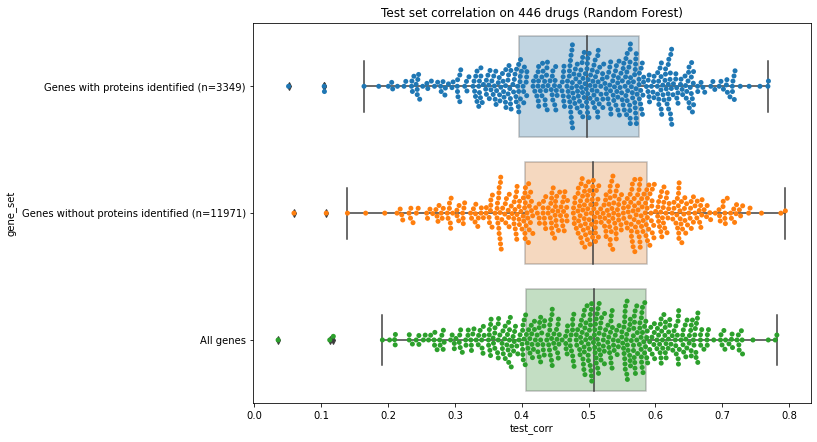

In [352]:
plt.figure(figsize=(10, 7))
ax = sns.boxplot('test_corr',
                 'gene_set',
                 data=scores_rf_rna_common_comp_combined,
                 orient='h',
                 boxprops=dict(alpha=.3))
sns.swarmplot('test_corr', 'gene_set', data=scores_rf_rna_common_comp_combined, orient='h')

plt.title("Test set correlation on 446 drugs (Random Forest)")

# parallel category

## test set

In [8]:
col = ['Drug Id', 'test_corr']

In [9]:
df_list = []

In [10]:
min_cell_line = 900
scores_rf_tissue = pd.read_csv("../work_dirs/meta_info/tissue_ic50/RandomForest/scores_202004041845_900.csv")[col]
scores_rf_tissue['model'] = 'RandomForest'
scores_rf_tissue['data'] = 'Tissue'

scores_en_rna = pd.read_csv("../work_dirs/rna_norm/ElasticNet/scores_202004032156_rna_900.csv")[col]
scores_en_rna['model'] = 'ElasticNet'
scores_en_rna['data'] = 'RNA'

scores_svm_rna = pd.read_csv("../work_dirs/rna_norm/SVM/scores_202004040136_rna_900.csv")[col]
scores_svm_rna['model'] = 'SVM'
scores_svm_rna['data'] = 'RNA'

scores_rf_rna = pd.read_csv("../work_dirs/rna_norm/RandomForest/scores_202004062351_rna_900.csv")[col]
scores_rf_rna['model'] = 'RandomForest'
scores_rf_rna['data'] = 'RNA'

scores_rf_rna_common = pd.read_csv("../work_dirs/rna_common_norm/RandomForest/scores_202004081136_rna_900.csv")[col]
scores_rf_rna_common['model'] = 'RandomForest'
scores_rf_rna_common['data'] = 'RNA_common'

tmp_df = pd.concat([scores_rf_tissue, scores_en_rna, scores_svm_rna, scores_rf_rna, scores_rf_rna_common])
tmp_df['min_cell_line'] = min_cell_line
tmp_df['normalisation'] = 'NA'
tmp_df['imputation'] = 'NA'

df_list.append(tmp_df)

In [11]:
scores_en_protein = pd.read_csv("../work_dirs/protein_norm/ElasticNet/scores_202004032215_ruv_zero_900.csv")[col]
scores_en_protein['model'] = 'ElasticNet'
scores_svm_protein = pd.read_csv("../work_dirs/protein_norm/SVM/scores_202004032216_ruv_zero_900.csv")[col]
scores_svm_protein['model'] = 'SVM'
scores_rf_protein = pd.read_csv("../work_dirs/protein_norm/RandomForest/scores_202004032212_ruv_zero_900.csv")[col]
scores_rf_protein['model'] = 'RandomForest'
tmp_df = pd.concat([scores_en_protein, scores_svm_protein, scores_rf_protein])
tmp_df['min_cell_line'] = min_cell_line
tmp_df['normalisation'] = 'RUV'
tmp_df['data'] = 'Protein'
tmp_df['imputation'] = 'zero'
df_list.append(tmp_df)


scores_en_protein = pd.read_csv("../work_dirs/protein_norm/ElasticNet/scores_202004040238_ruv_zero_900_median.csv")[col]
scores_en_protein['model'] = 'ElasticNet'
scores_svm_protein = pd.read_csv("../work_dirs/protein_norm/SVM/scores_202004040237_ruv_zero_900_median.csv")[col]
scores_svm_protein['model'] = 'SVM'
scores_rf_protein = pd.read_csv("../work_dirs/protein_norm/RandomForest/scores_202004040240_ruv_zero_900_median.csv")[col]
scores_rf_protein['model'] = 'RandomForest'
tmp_df = pd.concat([scores_en_protein, scores_svm_protein, scores_rf_protein])
tmp_df['min_cell_line'] = min_cell_line
tmp_df['normalisation'] = 'Median'
tmp_df['data'] = 'Protein'
tmp_df['imputation'] = 'zero'
df_list.append(tmp_df)


scores_en_protein = pd.read_csv("../work_dirs/protein_norm/ElasticNet/scores_202004041130_ruv_zero_900_rawmedian.csv")[col]
scores_en_protein['model'] = 'ElasticNet'
scores_svm_protein = pd.read_csv("../work_dirs/protein_norm/SVM/scores_202004041128_ruv_zero_900_rawmedian.csv")[col]
scores_svm_protein['model'] = 'SVM'
scores_rf_protein = pd.read_csv("../work_dirs/protein_norm/RandomForest/scores_202004041129_ruv_zero_900_rawmedian.csv")[col]
scores_rf_protein['model'] = 'RandomForest'
tmp_df = pd.concat([scores_en_protein, scores_svm_protein, scores_rf_protein])
tmp_df['min_cell_line'] = min_cell_line
tmp_df['normalisation'] = 'Raw-Median'
tmp_df['data'] = 'Protein'
tmp_df['imputation'] = 'zero'
df_list.append(tmp_df)


scores_en_protein = pd.read_csv("../work_dirs/protein_norm/ElasticNet/scores_202004041834_ruv_knn_900.csv")[col]
scores_en_protein['model'] = 'ElasticNet'
scores_svm_protein = pd.read_csv("../work_dirs/protein_norm/SVM/scores_202004041841_ruv_knn_900.csv")[col]
scores_svm_protein['model'] = 'SVM'
scores_rf_protein = pd.read_csv("../work_dirs/protein_norm/RandomForest/scores_202004041839_ruv_knn_900.csv")[col]
scores_rf_protein['model'] = 'RandomForest'
tmp_df = pd.concat([scores_en_protein, scores_svm_protein, scores_rf_protein])
tmp_df['min_cell_line'] = min_cell_line
tmp_df['normalisation'] = 'RUV'
tmp_df['data'] = 'Protein'
tmp_df['imputation'] = 'KNN'
df_list.append(tmp_df)


scores_en_protein = pd.read_csv("../work_dirs/protein_norm/ElasticNet/scores_202004101845_ruv_min_900.csv")[col]
scores_en_protein['model'] = 'ElasticNet'
scores_svm_protein = pd.read_csv("../work_dirs/protein_norm/SVM/scores_202004101843_ruv_min_900.csv")[col]
scores_svm_protein['model'] = 'SVM'
scores_rf_protein = pd.read_csv("../work_dirs/protein_norm/RandomForest/scores_202004101253_ruv_min_900.csv")[col]
scores_rf_protein['model'] = 'RandomForest'
tmp_df = pd.concat([scores_en_protein, scores_svm_protein, scores_rf_protein])
tmp_df['min_cell_line'] = min_cell_line
tmp_df['normalisation'] = 'RUV'
tmp_df['data'] = 'Protein'
tmp_df['imputation'] = 'MIN'
df_list.append(tmp_df)

In [12]:
scores_multi_rna = pd.read_csv(
    "../work_dirs/rna_norm/MultiDrug/scores_202004092336_res_900_14000.csv"
)
scores_multi_rna_norm_test = scores_multi_rna[
    scores_multi_rna['run'] == 'test'].reset_index(drop=True).rename(
        columns={'corr': 'test_corr'})
tmp_df = scores_multi_rna_norm_test[scores_multi_rna_norm_test['epoch']
                                        == 60][col].reset_index(drop=True)
tmp_df['min_cell_line'] = min_cell_line
tmp_df['normalisation'] = 'NA'
tmp_df['data'] = 'RNA'
tmp_df['imputation'] = 'NA'
tmp_df['model'] = 'MultiDrugNN'
df_list.append(tmp_df)


scores_multi_protein = pd.read_csv(
    "../work_dirs/protein_norm/MultiDrug/scores_202004031435_resx_ruv_mv_900.csv"
)
scores_multi_protein_norm_test = scores_multi_protein[
    scores_multi_protein['run'] == 'test'].reset_index(drop=True).rename(
        columns={'corr': 'test_corr'})
tmp_df = scores_multi_protein_norm_test[scores_multi_protein_norm_test['epoch']
                                        == 130][col].reset_index(drop=True)
tmp_df['min_cell_line'] = min_cell_line
tmp_df['normalisation'] = 'RUV'
tmp_df['data'] = 'Protein'
tmp_df['imputation'] = 'zero'
tmp_df['model'] = 'MultiDrugNN'
df_list.append(tmp_df)


scores_multi_protein = pd.read_csv(
    "../work_dirs/protein_norm/MultiDrug/scores_202004040153_resx_ruv_mv_900_median.csv"
)
scores_multi_protein_norm_test = scores_multi_protein[
    scores_multi_protein['run'] == 'test'].reset_index(drop=True).rename(
        columns={'corr': 'test_corr'})
tmp_df = scores_multi_protein_norm_test[scores_multi_protein_norm_test['epoch']
                                        == 140][col].reset_index(drop=True)
tmp_df['min_cell_line'] = min_cell_line
tmp_df['normalisation'] = 'Median'
tmp_df['data'] = 'Protein'
tmp_df['model'] = 'MultiDrugNN'
tmp_df['imputation'] = 'zero'
df_list.append(tmp_df)


scores_multi_protein = pd.read_csv(
    "../work_dirs/protein_norm/MultiDrug/scores_202004041127_resx_ruv_mv_900_rawmedian.csv"
)
scores_multi_protein_norm_test = scores_multi_protein[
    scores_multi_protein['run'] == 'test'].reset_index(drop=True).rename(
        columns={'corr': 'test_corr'})

tmp_df = scores_multi_protein_norm_test[scores_multi_protein_norm_test['epoch']
                                        == 120][col].reset_index(drop=True)
tmp_df['min_cell_line'] = min_cell_line
tmp_df['normalisation'] = 'Raw-Median'
tmp_df['data'] = 'Protein'
tmp_df['imputation'] = 'zero'
tmp_df['model'] = 'MultiDrugNN'
df_list.append(tmp_df)


scores_multi_protein = pd.read_csv(
    "../work_dirs/protein_norm/MultiDrug/scores_202004041833_resx_ruv_knn_900.csv"
)
scores_multi_protein_norm_test = scores_multi_protein[
    scores_multi_protein['run'] == 'test'].reset_index(drop=True).rename(
        columns={'corr': 'test_corr'})

tmp_df = scores_multi_protein_norm_test[scores_multi_protein_norm_test['epoch']
                                        == 130][col].reset_index(drop=True)
tmp_df['min_cell_line'] = min_cell_line
tmp_df['normalisation'] = 'RUV'
tmp_df['data'] = 'Protein'
tmp_df['imputation'] = 'KNN'
tmp_df['model'] = 'MultiDrugNN'
df_list.append(tmp_df)


scores_multi_protein = pd.read_csv(
    "../work_dirs/protein_norm/MultiDrug/scores_202004101500_resx_ruv_min_900.csv"
)
scores_multi_protein_norm_test = scores_multi_protein[
    scores_multi_protein['run'] == 'test'].reset_index(drop=True).rename(
        columns={'corr': 'test_corr'})

tmp_df = scores_multi_protein_norm_test[scores_multi_protein_norm_test['epoch']
                                        == 150][col].reset_index(drop=True)
tmp_df['min_cell_line'] = min_cell_line
tmp_df['normalisation'] = 'RUV'
tmp_df['data'] = 'Protein'
tmp_df['imputation'] = 'MIN'
tmp_df['model'] = 'MultiDrugNN'
df_list.append(tmp_df)

In [13]:
min_cell_line = 300

scores_rf_tissue = pd.read_csv("../work_dirs/meta_info/tissue_ic50/RandomForest/scores_202004041844_300.csv")[col]
scores_rf_tissue['model'] = 'RandomForest'
scores_rf_tissue['data'] = 'Tissue'

scores_en_rna = pd.read_csv("../work_dirs/rna_norm/ElasticNet/scores_202004032156_rna_300.csv")[col]
scores_en_rna['model'] = 'ElasticNet'
scores_en_rna['data'] = 'RNA'

scores_svm_rna = pd.read_csv("../work_dirs/rna_norm/SVM/scores_202004040135_rna_300.csv")[col]
scores_svm_rna['model'] = 'SVM'
scores_svm_rna['data'] = 'RNA'

scores_rf_rna = pd.read_csv("../work_dirs/rna_norm/RandomForest/scores_202004062350_rna_300.csv")[col]
scores_rf_rna['model'] = 'RandomForest'
scores_rf_rna['data'] = 'RNA'

scores_rf_rna_common = pd.read_csv("../work_dirs/rna_common_norm/RandomForest/scores_202004081135_rna_300.csv")[col]
scores_rf_rna_common['model'] = 'RandomForest'
scores_rf_rna_common['data'] = 'RNA_common'

tmp_df = pd.concat([scores_rf_tissue, scores_en_rna, scores_svm_rna, scores_rf_rna, scores_rf_rna_common])
tmp_df['min_cell_line'] = min_cell_line
tmp_df['normalisation'] = 'NA'
tmp_df['imputation'] = 'NA'
df_list.append(tmp_df)


scores_en_protein = pd.read_csv("../work_dirs/protein_norm/ElasticNet/scores_202004032214_ruv_zero_300.csv")[col]
scores_en_protein['model'] = 'ElasticNet'
scores_svm_protein = pd.read_csv("../work_dirs/protein_norm/SVM/scores_202004032217_ruv_zero_300.csv")[col]
scores_svm_protein['model'] = 'SVM'
scores_rf_protein = pd.read_csv("../work_dirs/protein_norm/RandomForest/scores_202004032212_ruv_zero_300.csv")[col]
scores_rf_protein['model'] = 'RandomForest'
tmp_df = pd.concat([scores_en_protein, scores_svm_protein, scores_rf_protein])
tmp_df['min_cell_line'] = min_cell_line
tmp_df['normalisation'] = 'RUV'
tmp_df['data'] = 'Protein'
tmp_df['imputation'] = 'zero'
df_list.append(tmp_df)


scores_en_protein = pd.read_csv("../work_dirs/protein_norm/ElasticNet/scores_202004040238_ruv_zero_300_median.csv")[col]
scores_en_protein['model'] = 'ElasticNet'
scores_svm_protein = pd.read_csv("../work_dirs/protein_norm/SVM/scores_202004040236_ruv_zero_300_median.csv")[col]
scores_svm_protein['model'] = 'SVM'
scores_rf_protein = pd.read_csv("../work_dirs/protein_norm/RandomForest/scores_202004040239_ruv_zero_300_median.csv")[col]
scores_rf_protein['model'] = 'RandomForest'
tmp_df = pd.concat([scores_en_protein, scores_svm_protein, scores_rf_protein])
tmp_df['min_cell_line'] = min_cell_line
tmp_df['normalisation'] = 'Median'
tmp_df['data'] = 'Protein'
tmp_df['imputation'] = 'zero'
df_list.append(tmp_df)


scores_en_protein = pd.read_csv("../work_dirs/protein_norm/ElasticNet/scores_202004041130_ruv_zero_300_rawmedian.csv")[col]
scores_en_protein['model'] = 'ElasticNet'
scores_svm_protein = pd.read_csv(
    "../work_dirs/protein_norm/SVM/scores_202004041128_ruv_zero_300_rawmedian.csv"
)[col]
scores_svm_protein['model'] = 'SVM'
scores_rf_protein = pd.read_csv(
    "../work_dirs/protein_norm/RandomForest/scores_202004041129_ruv_zero_300_rawmedian.csv"
)[col]
scores_rf_protein['model'] = 'RandomForest'
tmp_df = pd.concat([scores_en_protein, scores_svm_protein, scores_rf_protein])
tmp_df['min_cell_line'] = min_cell_line
tmp_df['normalisation'] = 'Raw-Median'
tmp_df['data'] = 'Protein'
tmp_df['imputation'] = 'zero'
df_list.append(tmp_df)


scores_en_protein = pd.read_csv("../work_dirs/protein_norm/ElasticNet/scores_202004041834_ruv_knn_300.csv")[col]
scores_en_protein['model'] = 'ElasticNet'
scores_svm_protein = pd.read_csv("../work_dirs/protein_norm/SVM/scores_202004041840_ruv_knn_300.csv")[col]
scores_svm_protein['model'] = 'SVM'
scores_rf_protein = pd.read_csv("../work_dirs/protein_norm/RandomForest/scores_202004041838_ruv_knn_300.csv")[col]
scores_rf_protein['model'] = 'RandomForest'
tmp_df = pd.concat([scores_en_protein, scores_svm_protein, scores_rf_protein])
tmp_df['min_cell_line'] = min_cell_line
tmp_df['normalisation'] = 'RUV'
tmp_df['data'] = 'Protein'
tmp_df['imputation'] = 'KNN'
df_list.append(tmp_df)


scores_en_protein = pd.read_csv("../work_dirs/protein_norm/ElasticNet/scores_202004101844_ruv_min_300.csv")[col]
scores_en_protein['model'] = 'ElasticNet'
scores_svm_protein = pd.read_csv("../work_dirs/protein_norm/SVM/scores_202004101842_ruv_min_300.csv")[col]
scores_svm_protein['model'] = 'SVM'
scores_rf_protein = pd.read_csv("../work_dirs/protein_norm/RandomForest/scores_202004101253_ruv_min_300.csv")[col]
scores_rf_protein['model'] = 'RandomForest'
tmp_df = pd.concat([scores_en_protein, scores_svm_protein, scores_rf_protein])
tmp_df['min_cell_line'] = min_cell_line
tmp_df['normalisation'] = 'RUV'
tmp_df['data'] = 'Protein'
tmp_df['imputation'] = 'MIN'
df_list.append(tmp_df)

In [14]:
scores_multi_rna = pd.read_csv(
    "../work_dirs/rna_norm/MultiDrug/scores_202004092336_res_300_14000.csv"
)
scores_multi_rna_norm_test = scores_multi_rna[
    scores_multi_rna['run'] == 'test'].reset_index(drop=True).rename(
        columns={'corr': 'test_corr'})
tmp_df = scores_multi_rna_norm_test[scores_multi_rna_norm_test['epoch']
                                        == 60][col].reset_index(drop=True)
tmp_df['min_cell_line'] = min_cell_line
tmp_df['normalisation'] = 'NA'
tmp_df['data'] = 'RNA'
tmp_df['imputation'] = 'NA'
tmp_df['model'] = 'MultiDrugNN'
df_list.append(tmp_df)

scores_multi_protein = pd.read_csv(
    "../work_dirs/protein_norm/MultiDrug/scores_202004031434_resx_ruv_mv_300.csv"
)
scores_multi_protein_norm_test = scores_multi_protein[
    scores_multi_protein['run'] == 'test'].reset_index(drop=True).rename(
        columns={'corr': 'test_corr'})
tmp_df = scores_multi_protein_norm_test[scores_multi_protein_norm_test['epoch']
                                        == 180][col].reset_index(drop=True)
tmp_df['min_cell_line'] = min_cell_line
tmp_df['normalisation'] = 'RUV'
tmp_df['data'] = 'Protein'
tmp_df['imputation'] = 'zero'
tmp_df['model'] = 'MultiDrugNN'
df_list.append(tmp_df)

scores_multi_protein = pd.read_csv(
    "../work_dirs/protein_norm/MultiDrug/scores_202004040154_resx_ruv_mv_300_median.csv"
)
scores_multi_protein_norm_test = scores_multi_protein[
    scores_multi_protein['run'] == 'test'].reset_index(drop=True).rename(
        columns={'corr': 'test_corr'})
tmp_df = scores_multi_protein_norm_test[scores_multi_protein_norm_test['epoch']
                                        == 180][col].reset_index(drop=True)
tmp_df['min_cell_line'] = min_cell_line
tmp_df['normalisation'] = 'Median'
tmp_df['data'] = 'Protein'
tmp_df['imputation'] = 'zero'
tmp_df['model'] = 'MultiDrugNN'
df_list.append(tmp_df)

scores_multi_protein = pd.read_csv(
    "../work_dirs/protein_norm/MultiDrug/scores_202004041128_resx_ruv_mv_300_rawmedian.csv"
)
scores_multi_protein_norm_test = scores_multi_protein[
    scores_multi_protein['run'] == 'test'].reset_index(drop=True).rename(
        columns={'corr': 'test_corr'})

tmp_df = scores_multi_protein_norm_test[scores_multi_protein_norm_test['epoch']
                                        == 180][col].reset_index(drop=True)
tmp_df['min_cell_line'] = min_cell_line
tmp_df['normalisation'] = 'Raw-Median'
tmp_df['data'] = 'Protein'
tmp_df['imputation'] = 'zero'
tmp_df['model'] = 'MultiDrugNN'
df_list.append(tmp_df)


scores_multi_protein = pd.read_csv(
    "../work_dirs/protein_norm/MultiDrug/scores_202004041832_resx_ruv_knn_300.csv"
)
scores_multi_protein_norm_test = scores_multi_protein[
    scores_multi_protein['run'] == 'test'].reset_index(drop=True).rename(
        columns={'corr': 'test_corr'})

tmp_df = scores_multi_protein_norm_test[scores_multi_protein_norm_test['epoch']
                                        == 180][col].reset_index(drop=True)
tmp_df['min_cell_line'] = min_cell_line
tmp_df['normalisation'] = 'RUV'
tmp_df['data'] = 'Protein'
tmp_df['imputation'] = 'KNN'
tmp_df['model'] = 'MultiDrugNN'
df_list.append(tmp_df)


scores_multi_protein = pd.read_csv(
    "../work_dirs/protein_norm/MultiDrug/scores_202004101623_resx_ruv_min_300.csv"
)
scores_multi_protein_norm_test = scores_multi_protein[
    scores_multi_protein['run'] == 'test'].reset_index(drop=True).rename(
        columns={'corr': 'test_corr'})

tmp_df = scores_multi_protein_norm_test[scores_multi_protein_norm_test['epoch']
                                        == 210][col].reset_index(drop=True)
tmp_df['min_cell_line'] = min_cell_line
tmp_df['normalisation'] = 'RUV'
tmp_df['data'] = 'Protein'
tmp_df['imputation'] = 'MIN'
tmp_df['model'] = 'MultiDrugNN'
df_list.append(tmp_df)

In [15]:
test_corr_all = pd.concat(df_list).groupby(
    ['data', 'model', 'normalisation',
     'imputation','min_cell_line'])['test_corr'].median().reset_index()

In [16]:
fig = px.parallel_categories(test_corr_all,
                             dimensions=[
                                 'data', 'model', 'normalisation',
                                 'imputation', 'min_cell_line'
                             ],
                             color="test_corr",
                             color_continuous_scale=px.colors.sequential.Inferno)
fig.show()

### protein-only parallel

#### step 1

In [17]:
test_corr_protein = test_corr_all[(test_corr_all['data']=='Protein') & (test_corr_all['imputation']=='zero')]
fig = px.parallel_categories(test_corr_protein,
                             dimensions=[
                                 'data', 'imputation', 'normalisation',
                                  'model', 'min_cell_line'
                             ],
                             color="test_corr",
                             color_continuous_scale=px.colors.sequential.Inferno)
fig.show()

Text(0.5, 1, 'test set performance on 212 drugs')

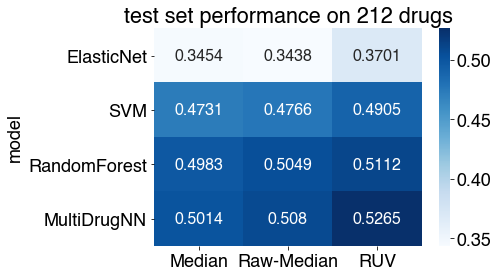

In [18]:
test_corr_protein_900 = test_corr_protein[test_corr_protein['min_cell_line']==900]

test_corr_protein_heatmap_900 = pd.pivot(
    test_corr_protein_900[['model', 'normalisation', 'test_corr']],
    index='model', columns='normalisation')

test_corr_protein_heatmap_900.columns = test_corr_protein_900['normalisation'].unique()
test_corr_protein_heatmap_900 = test_corr_protein_heatmap_900[['Median', 'Raw-Median', 'RUV']]

test_corr_protein_heatmap_900 = test_corr_protein_heatmap_900.reindex(
    ['ElasticNet', 'SVM', 'RandomForest', 'MultiDrugNN'])

sns.heatmap(test_corr_protein_heatmap_900,annot=True, cmap='Blues',fmt='.4g', annot_kws={"size": 16})
plt.title("test set performance on 212 drugs")

Text(0.5, 1, 'test set performance on 446 drugs')

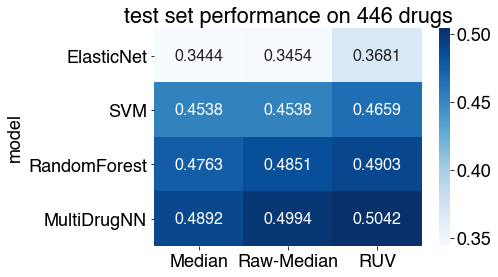

In [19]:
test_corr_protein_300 = test_corr_protein[test_corr_protein['min_cell_line']==300]

test_corr_protein_heatmap_300 = pd.pivot(
    test_corr_protein_300[['model', 'normalisation', 'test_corr']],
    index='model', columns='normalisation')

test_corr_protein_heatmap_300.columns = test_corr_protein_300['normalisation'].unique()
test_corr_protein_heatmap_300 = test_corr_protein_heatmap_300[['Median', 'Raw-Median', 'RUV']]

test_corr_protein_heatmap_300 = test_corr_protein_heatmap_300.reindex(
    ['ElasticNet', 'SVM', 'RandomForest', 'MultiDrugNN'])

sns.heatmap(test_corr_protein_heatmap_300,annot=True, cmap='Blues',fmt='.4g', annot_kws={"size": 16})
plt.title("test set performance on 446 drugs")

#### step 2

In [20]:
test_corr_protein = test_corr_all[(test_corr_all['data']=='Protein')& (test_corr_all['normalisation']=='RUV')]
fig = px.parallel_categories(test_corr_protein,
                             dimensions=[
                                 'data', 'imputation','normalisation',
                                  'model', 'min_cell_line'
                             ],
                             color="test_corr",
                             color_continuous_scale=px.colors.sequential.Inferno)
fig.show()

Text(0.5, 1, 'test set performance on 212 drugs')

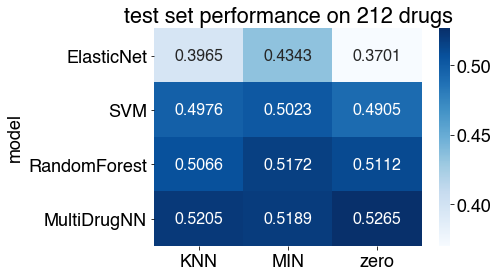

In [21]:
test_corr_protein_900 = test_corr_protein[test_corr_protein['min_cell_line']==900]

test_corr_protein_heatmap_900 = pd.pivot(
    test_corr_protein_900[['model', 'imputation', 'test_corr']],
    index='model', columns='imputation')

test_corr_protein_heatmap_900.columns = test_corr_protein_900['imputation'].unique()
test_corr_protein_heatmap_900 = test_corr_protein_heatmap_900[['KNN', 'MIN', 'zero']]

test_corr_protein_heatmap_900 = test_corr_protein_heatmap_900.reindex(
    ['ElasticNet', 'SVM', 'RandomForest', 'MultiDrugNN'])

sns.heatmap(test_corr_protein_heatmap_900,annot=True, cmap='Blues',fmt='.4g', annot_kws={"size": 16})
plt.title("test set performance on 212 drugs")

Text(0.5, 1, 'test set performance on 446 drugs')

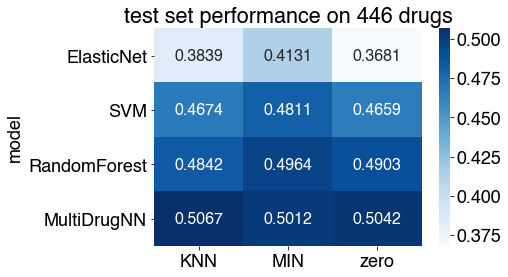

In [22]:
test_corr_protein_300 = test_corr_protein[test_corr_protein['min_cell_line']==300]

test_corr_protein_heatmap_300 = pd.pivot(
    test_corr_protein_300[['model', 'imputation', 'test_corr']],
    index='model', columns='imputation')

test_corr_protein_heatmap_300.columns = test_corr_protein_300['imputation'].unique()
test_corr_protein_heatmap_300 = test_corr_protein_heatmap_300[['KNN', 'MIN', 'zero']]

test_corr_protein_heatmap_300 = test_corr_protein_heatmap_300.reindex(
    ['ElasticNet', 'SVM', 'RandomForest', 'MultiDrugNN'])

sns.heatmap(test_corr_protein_heatmap_300,annot=True, cmap='Blues',fmt='.4g', annot_kws={"size": 16})
plt.title("test set performance on 446 drugs")

#### step 3

In [23]:
test_corr_protein_best = test_corr_all[
    (test_corr_all['data'] == 'Protein')
    & (((test_corr_all['imputation'] == 'zero') &
        (test_corr_all['model'] == 'MultiDrugNN')) | (
            (test_corr_all['imputation'] == 'MIN') &
            (test_corr_all['model'] != 'MultiDrugNN'))) &
    (test_corr_all['normalisation'] == 'RUV')]

In [24]:
test_corr_rna = pd.concat([test_corr_protein_best,test_corr_all[(test_corr_all['data']=='RNA')]])
fig = px.parallel_categories(test_corr_rna,
                             dimensions=[
                                 'data', 'imputation','normalisation',
                                  'model', 'min_cell_line'
                             ],
                             color="test_corr",
                             color_continuous_scale=px.colors.sequential.Inferno)
fig.show()

Text(0.5, 1, 'test set performance on 212 drugs')

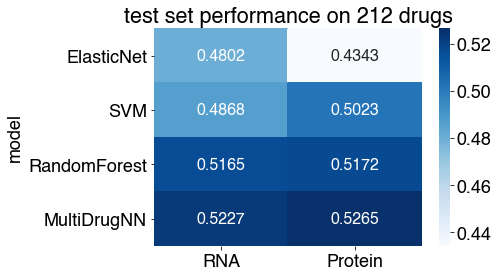

In [23]:
test_corr_protein_900 = test_corr_rna[test_corr_rna['min_cell_line']==900]

test_corr_protein_heatmap_900 = pd.pivot(
    test_corr_protein_900[['model', 'data', 'test_corr']],
    index='model', columns='data')

test_corr_protein_heatmap_900.columns = test_corr_protein_900['data'].unique()
test_corr_protein_heatmap_900 = test_corr_protein_heatmap_900[['RNA', 'Protein']]

test_corr_protein_heatmap_900 = test_corr_protein_heatmap_900.reindex(
    ['ElasticNet', 'SVM', 'RandomForest', 'MultiDrugNN'])

sns.heatmap(test_corr_protein_heatmap_900,annot=True, cmap='Blues',fmt='.4g', annot_kws={"size": 16})
plt.title("test set performance on 212 drugs")

Text(0.5, 1, 'test set performance on 446 drugs')

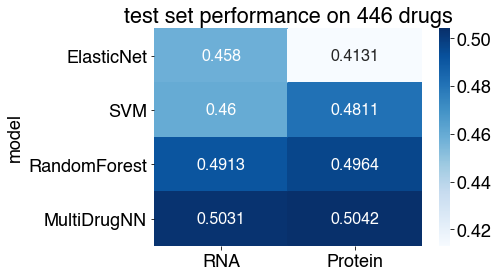

In [24]:
test_corr_protein_300 = test_corr_rna[test_corr_rna['min_cell_line']==300]

test_corr_protein_heatmap_300 = pd.pivot(
    test_corr_protein_300[['model', 'data', 'test_corr']],
    index='model', columns='data')

test_corr_protein_heatmap_300.columns = test_corr_protein_300['data'].unique()
test_corr_protein_heatmap_300 = test_corr_protein_heatmap_300[['RNA', 'Protein']]

test_corr_protein_heatmap_300 = test_corr_protein_heatmap_300.reindex(
    ['ElasticNet', 'SVM', 'RandomForest', 'MultiDrugNN'])

sns.heatmap(test_corr_protein_heatmap_300,annot=True, cmap='Blues',fmt='.4g', annot_kws={"size": 16})
plt.title("test set performance on 446 drugs")

### swarm plots

In [25]:
test_corr_df = pd.concat(df_list)

In [26]:
test_corr_df['key'] = test_corr_df.apply(
    lambda row:
    f"{row['data']}+{row['model'].replace(' ', '_')}+{row['normalisation']}+{row['imputation']}", axis=1)

In [27]:
test_corr_df['key'].unique()

array(['Tissue+RandomForest+NA+NA', 'RNA+ElasticNet+NA+NA',
       'RNA+SVM+NA+NA', 'RNA+RandomForest+NA+NA',
       'RNA_common+RandomForest+NA+NA', 'Protein+ElasticNet+RUV+zero',
       'Protein+SVM+RUV+zero', 'Protein+RandomForest+RUV+zero',
       'Protein+ElasticNet+Median+zero', 'Protein+SVM+Median+zero',
       'Protein+RandomForest+Median+zero',
       'Protein+ElasticNet+Raw-Median+zero',
       'Protein+SVM+Raw-Median+zero',
       'Protein+RandomForest+Raw-Median+zero',
       'Protein+ElasticNet+RUV+KNN', 'Protein+SVM+RUV+KNN',
       'Protein+RandomForest+RUV+KNN', 'Protein+ElasticNet+RUV+MIN',
       'Protein+SVM+RUV+MIN', 'Protein+RandomForest+RUV+MIN',
       'RNA+MultiDrugNN+NA+NA', 'Protein+MultiDrugNN+RUV+zero',
       'Protein+MultiDrugNN+Median+zero',
       'Protein+MultiDrugNN+Raw-Median+zero',
       'Protein+MultiDrugNN+RUV+KNN', 'Protein+MultiDrugNN+RUV+MIN'],
      dtype=object)

In [28]:
model_included = [
    'Tissue+RandomForest+NA+NA', 'RNA+ElasticNet+NA+NA',
    'RNA_common+RandomForest+NA+NA', 'RNA+RandomForest+NA+NA',
    'Protein+RandomForest+RUV+MIN', 'RNA+MultiDrugNN+NA+NA',
    'Protein+MultiDrugNN+RUV+zero'
]

#### min 900

In [57]:
test_corr_df_900 = test_corr_df[test_corr_df['min_cell_line']==900]

In [58]:
test_corr_df_included = test_corr_df_900[test_corr_df_900['key'].isin(model_included)]

Text(0.5, 1.0, 'Unbiased test set evaluation on 212 drugs')

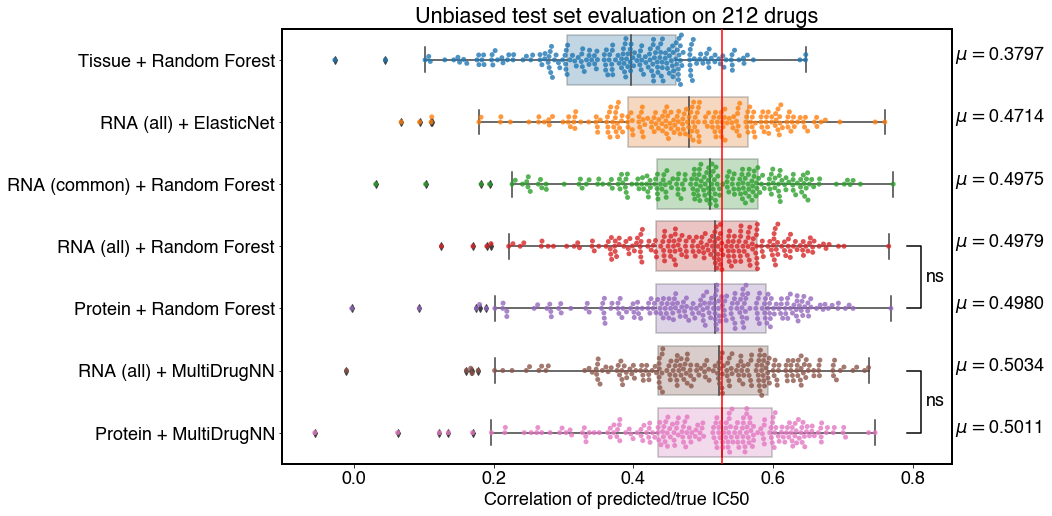

In [31]:
plt.figure(figsize=(12, 8))
ax = sns.boxplot('test_corr',
                 'key',
                 data=test_corr_df_included,
                 orient='h',
                 order=model_included,
                 boxprops=dict(alpha=.3))
sns.swarmplot('test_corr',
              'key',
              data=test_corr_df_included,
              orient='h',
              order=model_included,
              alpha=.8)
x = test_corr_df_included[
    test_corr_df_included['key'] ==
    'Protein+MultiDrugNN+RUV+zero']['test_corr'].median()
plt.plot([x, x], [-0.5, 7.5], color='red', zorder=10)
labels = [
    'Tissue + Random Forest', 
    'RNA (all) + ElasticNet',
    'RNA (common) + Random Forest', 
    'RNA (all) + Random Forest', 
    'Protein + Random Forest',
    'RNA (all) + MultiDrugNN', 
    'Protein + MultiDrugNN'
]
ax.set_yticklabels(labels)
plt.xlabel("Correlation of predicted/true IC50")
plt.ylabel("")

y1, y2 = 3, 4  # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
x, w, col = test_corr_df_included['test_corr'].max() + 0.02, 0.02, 'k'
plt.plot([x, x + w, x + w, x], [y1, y1, y2, y2], lw=1.5, c=col)
plt.text(x + w + 0.02, (y1 + y2) * .5, "ns", ha='center', va='center', color=col)

y1, y2 = 5, 6  # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
x, w, col = test_corr_df_included['test_corr'].max() + 0.02, 0.02, 'k'
plt.plot([x, x + w, x + w, x], [y1, y1, y2, y2], lw=1.5, c=col)
plt.text(x + w + 0.02, (y1 + y2) * .5, "ns", ha='center', va='center', color=col)

all_median = test_corr_df_included.groupby(['key'])['test_corr'].median().sort_values()
all_mean = []
for key in model_included:
    all_mean.append(test_corr_df_included[test_corr_df_included['key'] ==
                 key]['test_corr'].mean())

for i in range(len(all_median)):
    plt.text(0.86, i, r"$\mu=$"+f"{all_mean[i]:.4f}")

plt.title("Unbiased test set evaluation on 212 drugs")

In [32]:
test_corr_df_included.groupby(['key'])['test_corr'].median().sort_values()

key
Tissue+RandomForest+NA+NA        0.396318
RNA+ElasticNet+NA+NA             0.480223
RNA_common+RandomForest+NA+NA    0.510057
RNA+RandomForest+NA+NA           0.516483
Protein+RandomForest+RUV+MIN     0.517247
RNA+MultiDrugNN+NA+NA            0.522704
Protein+MultiDrugNN+RUV+zero     0.526482
Name: test_corr, dtype: float64

In [65]:
ttest_rel(test_corr_df_included[test_corr_df_included['key']=='RNA+RandomForest+NA+NA']['test_corr'].values,
          test_corr_df_included[test_corr_df_included['key']=='Protein+RandomForest+RUV+MIN']['test_corr'].values)

Ttest_relResult(statistic=-0.013902562627124882, pvalue=0.9889208536215954)

In [64]:
ttest_rel(test_corr_df_included[test_corr_df_included['key']=='RNA+MultiDrugNN+NA+NA']['test_corr'].values,
          test_corr_df_included[test_corr_df_included['key']=='Protein+MultiDrugNN+RUV+zero']['test_corr'].values)

Ttest_relResult(statistic=0.6692777990616634, pvalue=0.5040499410556155)

In [66]:
ttest_rel(test_corr_df_included[test_corr_df_included['key']=='RNA+MultiDrugNN+NA+NA']['test_corr'].values,
          test_corr_df_included[test_corr_df_included['key']=='RNA+RandomForest+NA+NA']['test_corr'].values)

Ttest_relResult(statistic=1.1456729531783723, pvalue=0.2532282202643724)

In [67]:
ttest_rel(test_corr_df_included[test_corr_df_included['key']=='Protein+RandomForest+RUV+MIN']['test_corr'].values,
          test_corr_df_included[test_corr_df_included['key']=='Protein+MultiDrugNN+RUV+zero']['test_corr'].values)

Ttest_relResult(statistic=-1.2015747222826032, pvalue=0.2308752641050747)

In [30]:
test_corr_df_included[test_corr_df_included['key'] ==
                          'Protein+RandomForest+RUV+MIN']

Drug Id  test_corr         model     data  min_cell_line normalisation  \
0        152   0.485454  RandomForest  Protein            900           RUV   
1        179   0.592637  RandomForest  Protein            900           RUV   
2        193   0.384898  RandomForest  Protein            900           RUV   
3        196   0.493492  RandomForest  Protein            900           RUV   
4        203   0.545527  RandomForest  Protein            900           RUV   
..       ...        ...           ...      ...            ...           ...   
207     1378   0.500104  RandomForest  Protein            900           RUV   
208     1494   0.555485  RandomForest  Protein            900           RUV   
209     1495   0.502828  RandomForest  Protein            900           RUV   
210     1498   0.530762  RandomForest  Protein            900           RUV   
211     1529   0.601653  RandomForest  Protein            900           RUV   

    imputation                           key  
0          MIN  Protein+RandomForest+RUV+MIN  
1          MIN  Protein+RandomForest+RUV+MIN  
2          MIN  Protein+RandomForest+RUV+MIN  
3          MIN  Protein+RandomForest+RUV+MIN  
4          MIN  Protein+RandomForest+RUV+MIN  
..         ...                           ...  
207        MIN  Protein+RandomForest+RUV+MIN  
208        MIN  Protein+RandomForest+RUV+MIN  
209        MIN  Protein+RandomForest+RUV+MIN  
210        MIN  Protein+RandomForest+RUV+MIN  
211        MIN  Protein+RandomForest+RUV+MIN  

[212 rows x 8 columns]

In [34]:
ttest_rel(
    test_corr_df_included[test_corr_df_included['key'] ==
                          'RNA+RandomForest+NA+NA']['test_corr'].values,
    test_corr_df_included[test_corr_df_included['key'] ==
                          'RNA+MultiDrugNN+NA+NA']['test_corr'].values)

Ttest_relResult(statistic=-1.1456729531783723, pvalue=0.2532282202643724)

In [35]:
hue_order = test_corr_df_included.groupby(['key'])['test_corr'].median().sort_values().index.values

Text(0, 0.5, '')

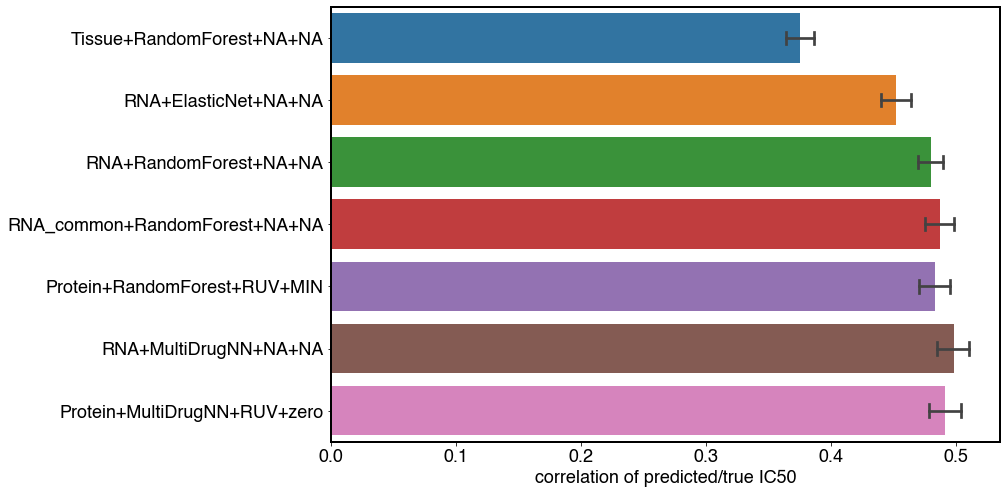

In [78]:
plt.figure(figsize=(12, 8))
sns.barplot(x='test_corr', y='key', data=test_corr_df_included, capsize=.2)
plt.xlabel("Correlation of predicted/true IC50")
plt.ylabel("")

#### min 300

In [117]:
test_corr_df_300 = test_corr_df[test_corr_df['min_cell_line']==300]

In [118]:
test_corr_df_included = test_corr_df_300[test_corr_df_300['key'].isin(model_included)]

Text(0.5, 1.0, 'Test set correlation on 446 drugs')

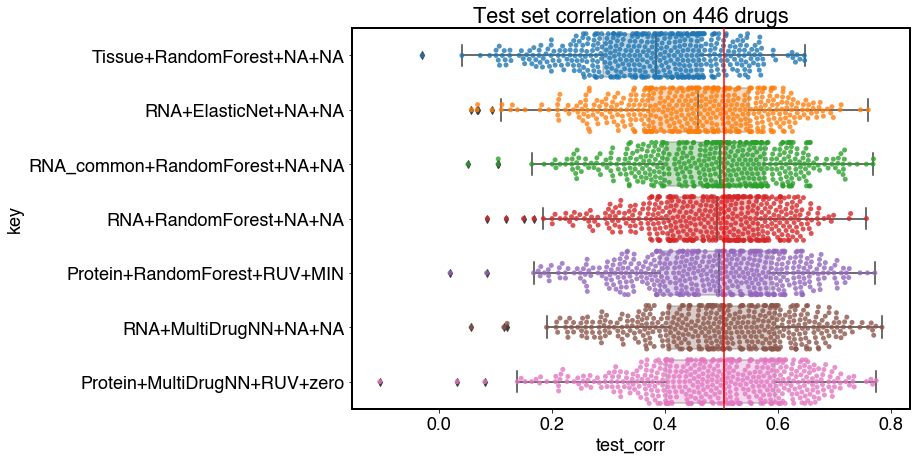

In [119]:
plt.figure(figsize=(10, 7))
ax = sns.boxplot('test_corr',
                 'key',
                 data=test_corr_df_included,
                 orient='h',
                 order=model_included,
                 boxprops=dict(alpha=.3))
sns.swarmplot('test_corr',
              'key',
              data=test_corr_df_included,
              orient='h',
              order=model_included,
              alpha=.8)
x = test_corr_df_included[
    test_corr_df_included['key'] ==
    'Protein+MultiDrugNN+RUV+zero']['test_corr'].median()
plt.plot([x, x], [-0.5, 7.5], color='red', zorder=10)
plt.title("Test set correlation on 446 drugs")


In [120]:
test_corr_df_included.groupby(['key'])['test_corr'].median().sort_values()

key
Tissue+RandomForest+NA+NA        0.384457
RNA+ElasticNet+NA+NA             0.457955
RNA+RandomForest+NA+NA           0.491296
Protein+RandomForest+RUV+MIN     0.496376
RNA_common+RandomForest+NA+NA    0.497945
RNA+MultiDrugNN+NA+NA            0.503080
Protein+MultiDrugNN+RUV+zero     0.504159
Name: test_corr, dtype: float64

In [122]:
ttest_rel(test_corr_df_included[test_corr_df_included['key']=='Protein+RandomForest+RUV+MIN']['test_corr'].values,
          test_corr_df_included[test_corr_df_included['key']=='Protein+MultiDrugNN+RUV+zero']['test_corr'].values)

Ttest_relResult(statistic=-3.978753705447184, pvalue=8.08636924522468e-05)

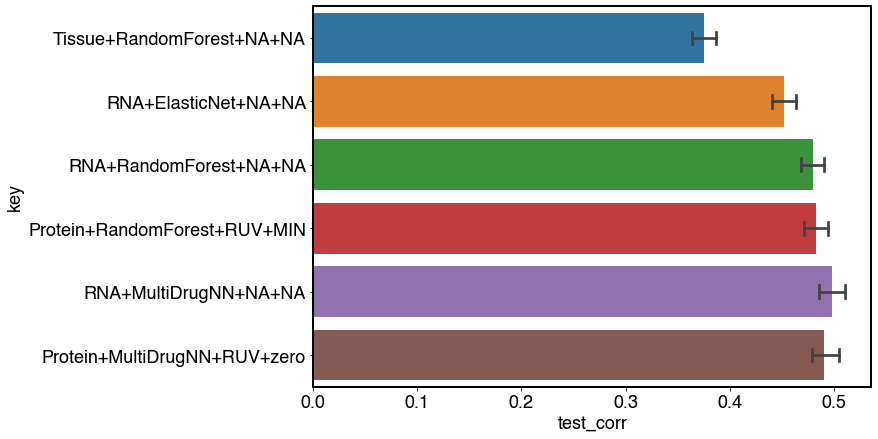

In [83]:
plt.figure(figsize=(10, 7))
sns.barplot(x='test_corr', y='key', data=test_corr_df_included, capsize=.2)


### by drug types

In [34]:
test_corr_df = pd.concat(df_list)

In [35]:
test_corr_df['key'] = test_corr_df.apply(
    lambda row:
    f"{row['data']}+{row['model'].replace(' ', '_')}+{row['normalisation']}+{row['imputation']}", axis=1)

In [36]:
test_corr_df['key'].unique()

array(['Tissue+RandomForest+NA+NA', 'RNA+ElasticNet+NA+NA',
       'RNA+SVM+NA+NA', 'RNA+RandomForest+NA+NA',
       'RNA_common+RandomForest+NA+NA', 'Protein+ElasticNet+RUV+zero',
       'Protein+SVM+RUV+zero', 'Protein+RandomForest+RUV+zero',
       'Protein+ElasticNet+Median+zero', 'Protein+SVM+Median+zero',
       'Protein+RandomForest+Median+zero',
       'Protein+ElasticNet+Raw-Median+zero',
       'Protein+SVM+Raw-Median+zero',
       'Protein+RandomForest+Raw-Median+zero',
       'Protein+ElasticNet+RUV+KNN', 'Protein+SVM+RUV+KNN',
       'Protein+RandomForest+RUV+KNN', 'Protein+ElasticNet+RUV+MIN',
       'Protein+SVM+RUV+MIN', 'Protein+RandomForest+RUV+MIN',
       'RNA+MultiDrugNN+NA+NA', 'Protein+MultiDrugNN+RUV+zero',
       'Protein+MultiDrugNN+Median+zero',
       'Protein+MultiDrugNN+Raw-Median+zero',
       'Protein+MultiDrugNN+RUV+KNN', 'Protein+MultiDrugNN+RUV+MIN'],
      dtype=object)

#### MultiDrugNN

##### min 900

In [37]:
drug_meta = pd.read_csv("../data/drug/screened_compunds_rel_8.2.csv")
rna_df = test_corr_df[test_corr_df['key'] == 'RNA+MultiDrugNN+NA+NA']
protein_df = test_corr_df[test_corr_df['key'] ==
                          'Protein+MultiDrugNN+RUV+zero']
rna_df = rna_df[rna_df['min_cell_line'] == 900]
protein_df = protein_df[protein_df['min_cell_line'] == 900]

In [38]:
target_pathway_dict = drug_meta[[
    'DRUG_ID', 'TARGET_PATHWAY'
]].drop_duplicates().set_index(['DRUG_ID']).to_dict()['TARGET_PATHWAY']

In [39]:
protein_df['target_pathway'] = protein_df['Drug Id'].map(target_pathway_dict)

Text(0.5, 1.0, 'Model performance by drug target pathways')

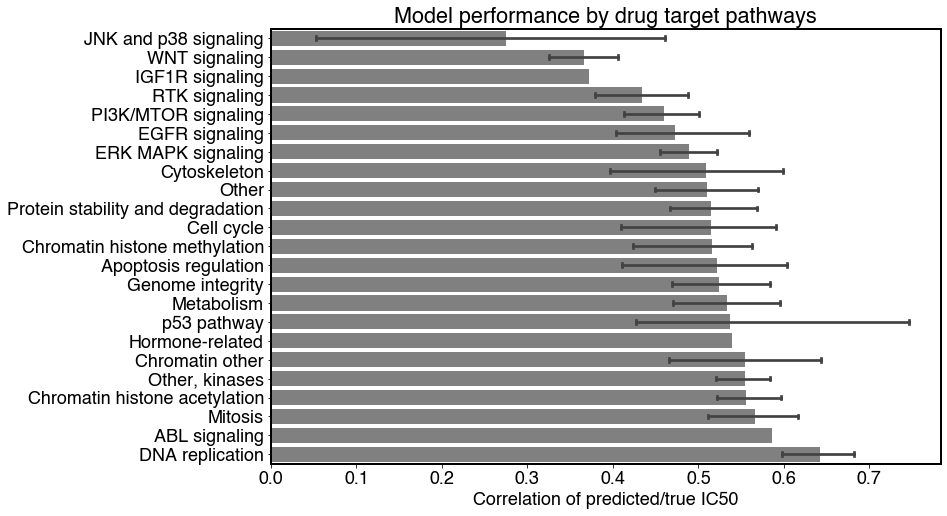

In [40]:
order = protein_df.groupby(['target_pathway'])['test_corr'].mean().sort_values().index.values
plt.figure(figsize=(12, 8))
sns.barplot(x='test_corr',
            y='target_pathway',
            data=protein_df,
            color='grey',
            capsize=.2,
            order=order)
plt.ylabel("")
plt.xlabel('Correlation of predicted/true IC50')
plt.title('Model performance by drug target pathways')

Text(0.5, 1.0, 'Predicative improvement using protein data')

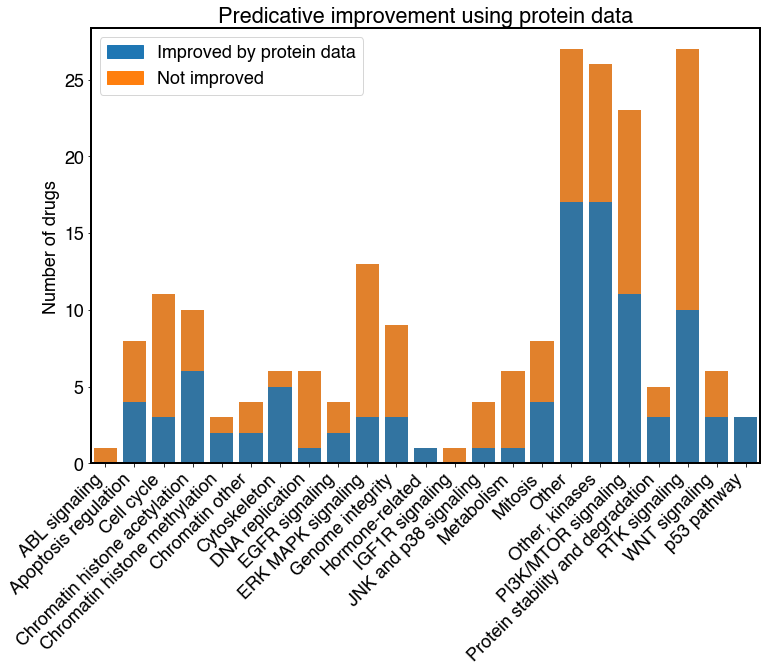

In [41]:
tmp = pd.merge(rna_df[['Drug Id', 'test_corr']],
               protein_df[['Drug Id', 'test_corr']],
               on=['Drug Id'])

tmp.columns = ['Drug Id', 'RNA_correlation', 'Protein_correlation']

tmp['delta'] = tmp['Protein_correlation'] - tmp['RNA_correlation']

tmp = pd.merge(tmp, drug_meta, left_on=['Drug Id'], right_on=['DRUG_ID'])
tmp['improved'] = (tmp['Protein_correlation'] >
                   tmp['RNA_correlation']).astype(int)

plt.figure(figsize=(12, 8))
g1 = sns.barplot(x='TARGET_PATHWAY',
                y='improved',
                data=tmp.groupby(['TARGET_PATHWAY'
                                  ])['improved'].size().reset_index(),
                color='#ff7f0e')
g2 = sns.barplot(x='TARGET_PATHWAY',
                y='improved',
                data=tmp.groupby(['TARGET_PATHWAY'
                                  ])['improved'].sum().reset_index(),
                color="#1f77b4")

total_patch = mpatches.Patch(color='#ff7f0e', label='Not improved')
improved_patch = mpatches.Patch(color='#1f77b4', label='Improved by protein data')

plt.legend(handles=[total_patch, improved_patch])

plt.legend(handles=[improved_patch, total_patch])
plt.ylabel('Number of drugs')
plt.xticks(rotation=45, ha='right')
plt.xlabel('')
plt.title("Predicative improvement using protein data")

In [42]:
tmp_MDNN_900 = tmp.sort_values(by=['delta'], ascending=False)
tmp_MDNN_900 = pd.merge(tmp_MDNN_900, ic50_sensitive_merge, on=['Drug Id'])
tmp_MDNN_900.to_csv("../data/drug/RNAvsProtein_MultiDrugNN_min900.tsv", sep='\t', index=False)

##### min 300

In [216]:
drug_meta = pd.read_csv("../data/drug/screened_compunds_rel_8.2.csv")
rna_df = test_corr_df[test_corr_df['key'] == 'RNA+MultiDrugNN+NA+NA']
protein_df = test_corr_df[test_corr_df['key'] ==
                          'Protein+MultiDrugNN+RUV+zero']
rna_df = rna_df[rna_df['min_cell_line'] == 300]
protein_df = protein_df[protein_df['min_cell_line'] == 300]

In [217]:
target_pathway_dict = drug_meta[[
    'DRUG_ID', 'TARGET_PATHWAY'
]].drop_duplicates().set_index(['DRUG_ID']).to_dict()['TARGET_PATHWAY']

In [218]:
protein_df['target_pathway'] = protein_df['Drug Id'].map(target_pathway_dict)

Text(0.5, 1.0, 'MultiDrugNN with protein data test set accuracy by target pathways')

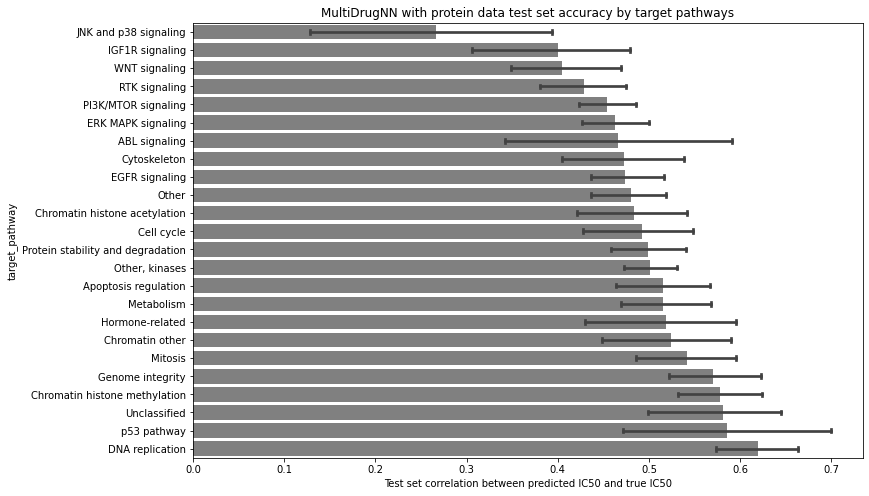

In [219]:
order = protein_df.groupby(['target_pathway'])['test_corr'].mean().sort_values().index.values
plt.figure(figsize=(12, 8))
sns.barplot(x='test_corr',
            y='target_pathway',
            data=protein_df,
            color='grey',
            capsize=.2,
            order=order)
plt.xlabel('Test set correlation between predicted IC50 and true IC50')
plt.title('MultiDrugNN with protein data test set accuracy by target pathways')

Text(0.5, 1.0, 'Number of improved performance by target pathways')

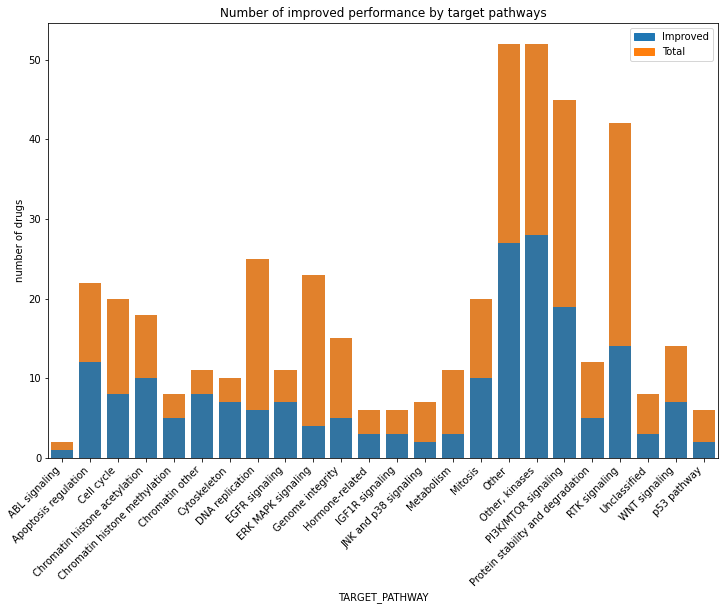

In [220]:
tmp = pd.merge(rna_df[['Drug Id', 'test_corr']],
               protein_df[['Drug Id', 'test_corr']],
               on=['Drug Id'])

tmp.columns = ['Drug Id', 'RNA_correlation', 'Protein_correlation']

tmp['delta'] = tmp['Protein_correlation'] - tmp['RNA_correlation']

tmp = pd.merge(tmp, drug_meta, left_on=['Drug Id'], right_on=['DRUG_ID'])

tmp['improved'] = (tmp['Protein_correlation'] >
                   tmp['RNA_correlation']).astype(int)
plt.figure(figsize=(12, 8))
g1 = sns.barplot(x='TARGET_PATHWAY',
                y='improved',
                data=tmp.groupby(['TARGET_PATHWAY'
                                  ])['improved'].size().reset_index(),
                color='#ff7f0e')
g2 = sns.barplot(x='TARGET_PATHWAY',
                y='improved',
                data=tmp.groupby(['TARGET_PATHWAY'
                                  ])['improved'].sum().reset_index(),
                color="#1f77b4")

total_patch = mpatches.Patch(color='#ff7f0e', label='Total')
improved_patch = mpatches.Patch(color='#1f77b4', label='Improved')

plt.legend(handles=[total_patch, improved_patch])

plt.legend(handles=[improved_patch, total_patch])
plt.ylabel('number of drugs')
plt.xticks(rotation=45, ha='right')
plt.title("Number of improved performance by target pathways")

In [221]:
tmp_MDNN_300 = tmp.sort_values(by=['delta'], ascending=False)
tmp_MDNN_300 = pd.merge(tmp_MDNN_300, ic50_sensitive_merge, on=['Drug Id'])
tmp_MDNN_300.to_csv("../data/drug/RNAvsProtein_MultiDrugNN_min300.tsv", sep='\t', index=False)

#### RF

##### min 900

In [43]:
drug_meta = pd.read_csv("../data/drug/screened_compunds_rel_8.2.csv")
rna_df = test_corr_df[test_corr_df['key'] == 'RNA+RandomForest+NA+NA']
protein_df = test_corr_df[test_corr_df['key'] ==
                          'Protein+RandomForest+RUV+MIN']
rna_df = rna_df[rna_df['min_cell_line'] == 900]
protein_df = protein_df[protein_df['min_cell_line'] == 900]

In [44]:
target_pathway_dict = drug_meta[[
    'DRUG_ID', 'TARGET_PATHWAY'
]].drop_duplicates().set_index(['DRUG_ID']).to_dict()['TARGET_PATHWAY']

In [45]:
protein_df['target_pathway'] = protein_df['Drug Id'].map(target_pathway_dict)

Text(0.5, 1.0, 'MultiDrugNN with protein data test set accuracy by target pathways')

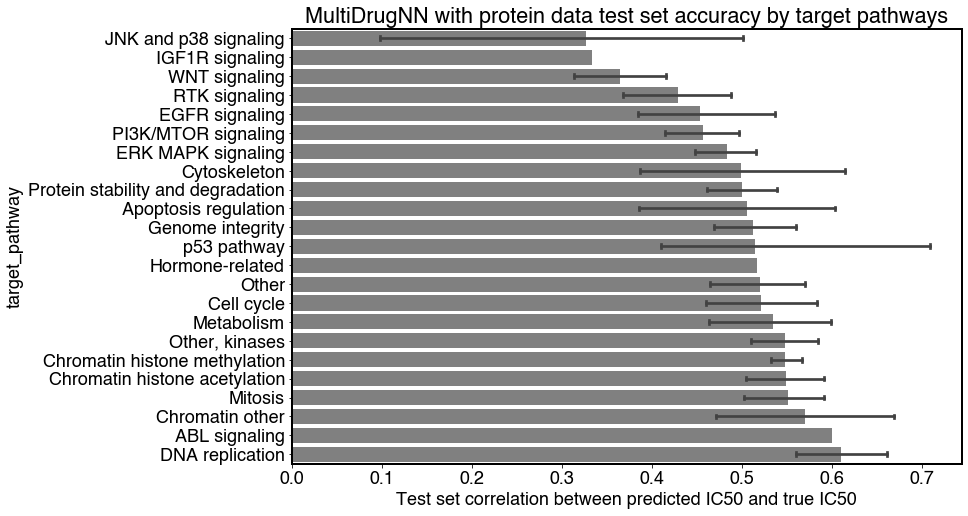

In [46]:
order = protein_df.groupby(['target_pathway'])['test_corr'].mean().sort_values().index.values
plt.figure(figsize=(12, 8))
sns.barplot(x='test_corr',
            y='target_pathway',
            data=protein_df,
            color='grey',
            capsize=.2,
            order=order)
plt.xlabel('Test set correlation between predicted IC50 and true IC50')
plt.title('MultiDrugNN with protein data test set accuracy by target pathways')

Text(0.5, 1.0, 'Number of improved performance by target pathways')

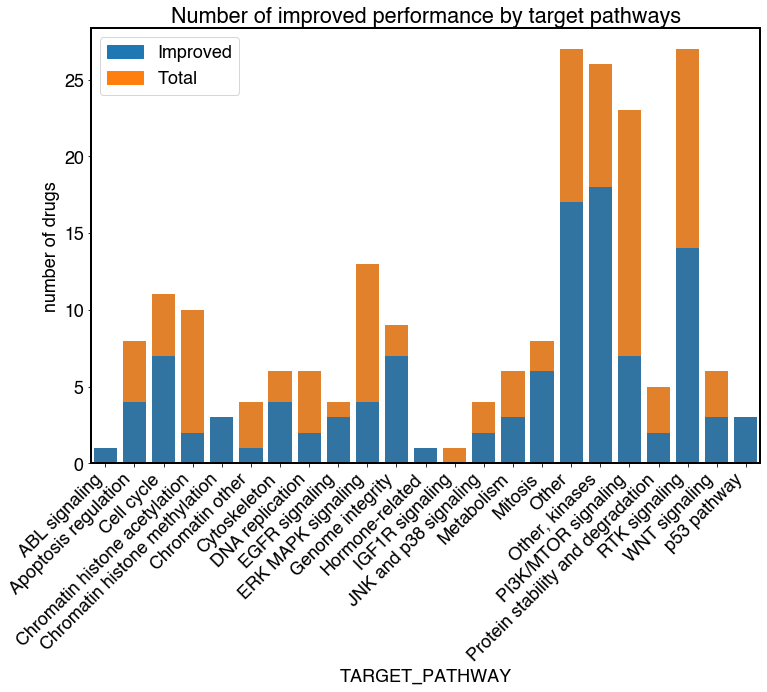

In [47]:
tmp = pd.merge(rna_df[['Drug Id', 'test_corr']],
               protein_df[['Drug Id', 'test_corr']],
               on=['Drug Id'])

tmp.columns = ['Drug Id', 'RNA_correlation', 'Protein_correlation']

tmp['delta'] = tmp['Protein_correlation'] - tmp['RNA_correlation']

tmp = pd.merge(tmp, drug_meta, left_on=['Drug Id'], right_on=['DRUG_ID'])

tmp['improved'] = (tmp['Protein_correlation'] >
                   tmp['RNA_correlation']).astype(int)
plt.figure(figsize=(12, 8))
g1 = sns.barplot(x='TARGET_PATHWAY',
                y='improved',
                data=tmp.groupby(['TARGET_PATHWAY'
                                  ])['improved'].size().reset_index(),
                color='#ff7f0e')
g2 = sns.barplot(x='TARGET_PATHWAY',
                y='improved',
                data=tmp.groupby(['TARGET_PATHWAY'
                                  ])['improved'].sum().reset_index(),
                color="#1f77b4")

total_patch = mpatches.Patch(color='#ff7f0e', label='Total')
improved_patch = mpatches.Patch(color='#1f77b4', label='Improved')

plt.legend(handles=[total_patch, improved_patch])

plt.legend(handles=[improved_patch, total_patch])
plt.ylabel('number of drugs')
plt.xticks(rotation=45, ha='right')
plt.title("Number of improved performance by target pathways")

In [48]:
tmp_RF_900 = tmp.sort_values(by=['delta'], ascending=False)
tmp_RF_900 = pd.merge(tmp_RF_900, ic50_sensitive_merge, on=['Drug Id'])
tmp_RF_900.to_csv("../data/drug/RNAvsProtein_RandomForest_min900.tsv", sep='\t', index=False)

##### min 300

In [228]:
drug_meta = pd.read_csv("../data/drug/screened_compunds_rel_8.2.csv")
rna_df = test_corr_df[test_corr_df['key'] == 'RNA+RandomForest+NA+NA']
protein_df = test_corr_df[test_corr_df['key'] ==
                          'Protein+RandomForest+RUV+MIN']
rna_df = rna_df[rna_df['min_cell_line'] == 300]
protein_df = protein_df[protein_df['min_cell_line'] == 300]

In [229]:
target_pathway_dict = drug_meta[[
    'DRUG_ID', 'TARGET_PATHWAY'
]].drop_duplicates().set_index(['DRUG_ID']).to_dict()['TARGET_PATHWAY']

In [230]:
protein_df['target_pathway'] = protein_df['Drug Id'].map(target_pathway_dict)

Text(0.5, 1.0, 'MultiDrugNN with protein data test set accuracy by target pathways')

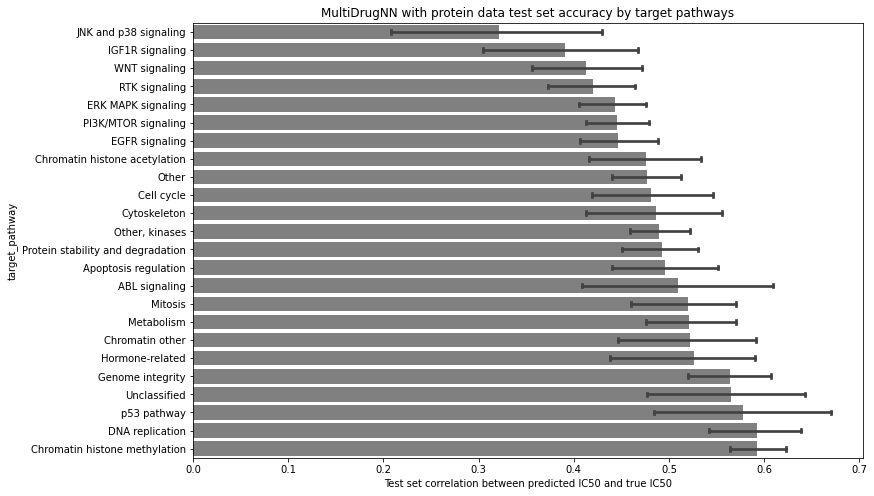

In [231]:
order = protein_df.groupby(['target_pathway'])['test_corr'].mean().sort_values().index.values
plt.figure(figsize=(12, 8))
sns.barplot(x='test_corr',
            y='target_pathway',
            data=protein_df,
            color='grey',
            capsize=.2,
            order=order)
plt.xlabel('Test set correlation between predicted IC50 and true IC50')
plt.title('MultiDrugNN with protein data test set accuracy by target pathways')

Text(0.5, 1.0, 'Number of improved performance by target pathways')

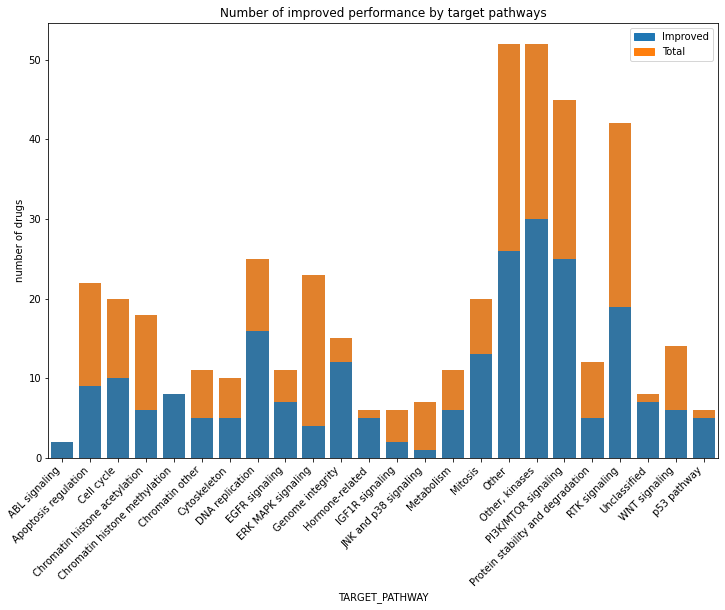

In [232]:
tmp = pd.merge(rna_df[['Drug Id', 'test_corr']],
               protein_df[['Drug Id', 'test_corr']],
               on=['Drug Id'])

tmp.columns = ['Drug Id', 'RNA_correlation', 'Protein_correlation']

tmp['delta'] = tmp['Protein_correlation'] - tmp['RNA_correlation']

tmp = pd.merge(tmp, drug_meta, left_on=['Drug Id'], right_on=['DRUG_ID'])

tmp['improved'] = (tmp['Protein_correlation'] >
                   tmp['RNA_correlation']).astype(int)
plt.figure(figsize=(12, 8))
g1 = sns.barplot(x='TARGET_PATHWAY',
                y='improved',
                data=tmp.groupby(['TARGET_PATHWAY'
                                  ])['improved'].size().reset_index(),
                color='#ff7f0e')
g2 = sns.barplot(x='TARGET_PATHWAY',
                y='improved',
                data=tmp.groupby(['TARGET_PATHWAY'
                                  ])['improved'].sum().reset_index(),
                color="#1f77b4")

total_patch = mpatches.Patch(color='#ff7f0e', label='Total')
improved_patch = mpatches.Patch(color='#1f77b4', label='Improved')

plt.legend(handles=[total_patch, improved_patch])

plt.legend(handles=[improved_patch, total_patch])
plt.ylabel('number of drugs')
plt.xticks(rotation=45, ha='right')
plt.title("Number of improved performance by target pathways")

In [233]:
tmp_RF_300 = tmp.sort_values(by=['delta'], ascending=False)
tmp_RF_300 = pd.merge(tmp_RF_300, ic50_sensitive_merge, on=['Drug Id'])
tmp_RF_300.to_csv("../data/drug/RNAvsProtein_RandomForest_min300.tsv", sep='\t', index=False)

#### top protein improvement drug list min 900

In [55]:
topN = 100

In [56]:
overlap = set(tmp_RF_900.head(topN)['Drug Id']).intersection(tmp_MDNN_900.head(topN)['Drug Id'])

In [57]:
pd.options.display.float_format = '{:,.2f}'.format
tmp_MDNN_900_top = tmp_MDNN_900[(tmp_MDNN_900['Drug Id'].isin(overlap)) & (tmp_MDNN_900['sensitive_count'] > 10)]

In [58]:
tmp_RF_900_top = tmp_RF_900[(tmp_RF_900['Drug Id'].isin(overlap)) & (tmp_RF_900['sensitive_count'] > 10)]

In [62]:
top_protien_drug = pd.merge(tmp_RF_900_top[[
    'DRUG_NAME', 'TARGET', 'RNA_correlation', 'Protein_correlation'
]],
         tmp_MDNN_900_top[[
             'DRUG_NAME', 'TARGET', 'RNA_correlation', 'Protein_correlation'
         ]],
         on=['DRUG_NAME', 'TARGET'],
         suffixes=['_RF', '_MultiDrugNN']).sort_values(by='DRUG_NAME')
top_protien_drug.head(20)

DRUG_NAME                                 TARGET  \
34              ARRY-520                                  KIF11   
17                AT7867                                    AKT   
13              Afatinib                            ERBB2, EGFR   
36                 BX795  TBK1, PDK1 (PDPK1), IKK, AURKB, AURKC   
28             Bosutinib                          SRC, ABL, TEC   
12  Brivanib, BMS-540215                           VEGFR, PDGFR   
5               CAY10566                Stearoyl-CoA desaturase   
47            Cytarabine                         Antimetabolite   
27            Dactolisib         PI3K (class 1), MTORC1, MTORC2   
48           Enzastaurin                                   PKCB   
46            Fedratinib                                   JAK2   
16            GSK429286A                           ROCK1, ROCK2   
38      Genentech Cpd 10                           AURKA, AURKB   
4                   IOX2                                  EGLN1   
21    Ispinesib Mesylate                                    KSP   
43            LDN-193189                                    BMP   
10                LGK974                                  PORCN   
7   LIMK1 inhibitor BMS4                                  LIMK1   
24          Lestaurtinib        FLT3, JAK2, NTRK1, NTRK2, NTRK3   
22               MK-2206                             AKT1, AKT2   

    RNA_correlation_RF  Protein_correlation_RF  RNA_correlation_MultiDrugNN  \
34                0.58                    0.61                         0.61   
17                0.54                    0.61                         0.62   
13                0.29                    0.38                         0.36   
36                0.48                    0.51                         0.48   
28                0.46                    0.51                         0.52   
12                0.45                    0.56                         0.47   
5                 0.46                    0.61                         0.59   
47                0.62                    0.63                         0.67   
27                0.34                    0.39                         0.34   
48                0.39                    0.41                         0.39   
46                0.58                    0.59                         0.58   
16                0.56                    0.63                         0.59   
38                0.50                    0.53                         0.46   
4                 0.20                    0.35                         0.16   
21                0.48                    0.55                         0.52   
43                0.54                    0.56                         0.44   
10                0.32                    0.43                         0.38   
7                 0.34                    0.47                         0.43   
24                0.46                    0.52                         0.56   
22                0.45                    0.52                         0.53   

    Protein_correlation_MultiDrugNN  
34                             0.64  
17                             0.64  
13                             0.40  
36                             0.54  
28                             0.53  
12                             0.54  
5                              0.62  
47                             0.68  
27                             0.44  
48                             0.43  
46                             0.60  
16                             0.61  
38                             0.52  
4                              0.31  
21                             0.56  
43                             0.52  
10                             0.45  
7                              0.45  
24                             0.57  
22                             0.54

### consistency with RNA

In [75]:
model_included = [
    'RNA+RandomForest+NA+NA', 'RNA+MultiDrugNN+NA+NA',
    'Protein+RandomForest+RUV+MIN', 'Protein+MultiDrugNN+RUV+zero'
]

In [143]:
def corrfunc(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    # Unicode for lowercase rho (ρ)
    rho = '\u03C1'
    ax.annotate(f'{rho} = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)
    ax.plot((0, 0.8), (0, 0.8), color='red', zorder=10)

In [144]:
def medianfunc(x, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    median = np.median(x)
    ax = ax or plt.gca()
    ax.annotate(f'med: {median:.4f}', xy=(.1, .9), xycoords=ax.transAxes)


#### min 900

In [145]:
test_corr_df_900 = test_corr_df[test_corr_df['min_cell_line']==900]

In [146]:
test_corr_df_included = test_corr_df_900[test_corr_df_900['key'].isin(model_included)]

Text(0, 0.5, 'Protein+MultiDrugNN+RUV+zero')

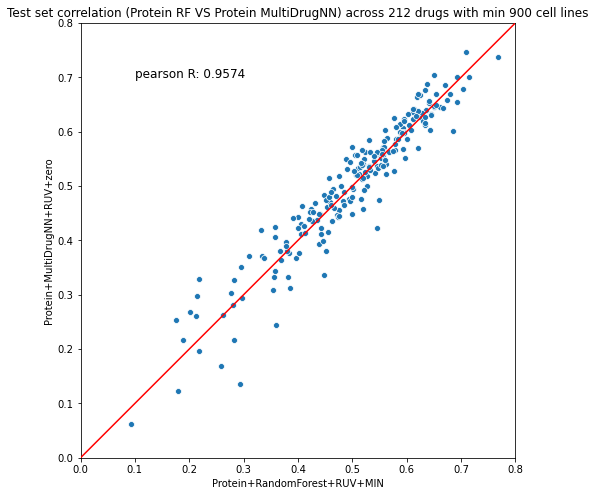

In [147]:
plt.figure(figsize=(12, 8))
model_0 = 'Protein+RandomForest+RUV+MIN'
model_1 = 'Protein+MultiDrugNN+RUV+zero'
r = pearsonr(
    test_corr_df_included[test_corr_df_included['key'] == model_0]
    ['test_corr'].values, test_corr_df_included[
        test_corr_df_included['key'] == model_1]['test_corr'].values)[0]
g = sns.scatterplot(x=test_corr_df_included[test_corr_df_included['key'] ==
                                            model_0]['test_corr'].values,
                    y=test_corr_df_included[test_corr_df_included['key'] ==
                                            model_1]['test_corr'].values)
g.plot((0, 0.8), (0, 0.8), color='red', zorder=10)
g.set_xlim(0, 0.8)
g.set_ylim(0, 0.8)
g.set_aspect('equal')
g.text(0.1, 0.7, f"pearson R: {r:0.4f}", fontsize=12)
plt.title('Test set correlation (Protein RF VS Protein MultiDrugNN) across 212 drugs with min 900 cell lines')
plt.xlabel(model_0)
plt.ylabel(model_1)

Text(0, 0.5, 'Protein+MultiDrugNN+RUV+zero')

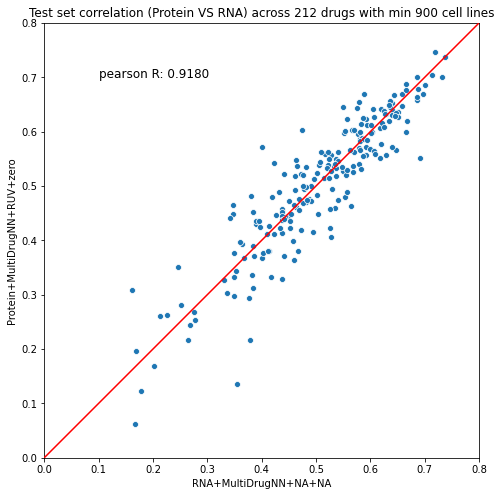

In [148]:
plt.figure(figsize=(12, 8))
model_0 = 'RNA+MultiDrugNN+NA+NA'
model_1 = 'Protein+MultiDrugNN+RUV+zero'
r = pearsonr(
    test_corr_df_included[test_corr_df_included['key'] == model_0]
    ['test_corr'].values, test_corr_df_included[
        test_corr_df_included['key'] == model_1]['test_corr'].values)[0]
g = sns.scatterplot(x=test_corr_df_included[test_corr_df_included['key'] ==
                                            model_0]['test_corr'].values,
                    y=test_corr_df_included[test_corr_df_included['key'] ==
                                            model_1]['test_corr'].values)
g.plot((0, 0.8), (0, 0.8), color='red', zorder=10)
g.set_xlim(0, 0.8)
g.set_ylim(0, 0.8)
g.set_aspect('equal')
g.text(0.1, 0.7, f"pearson R: {r:0.4f}", fontsize=12)
plt.title('Test set correlation (Protein VS RNA) across 212 drugs with min 900 cell lines')
plt.xlabel(model_0)
plt.ylabel(model_1)

In [149]:
test_corr_df_included = test_corr_df_included[['Drug Id', 'key', 'test_corr']]
test_corr_df_included_pivot = pd.pivot(test_corr_df_included,
                                       index='Drug Id',
                                       columns='key',
                                       values='test_corr')

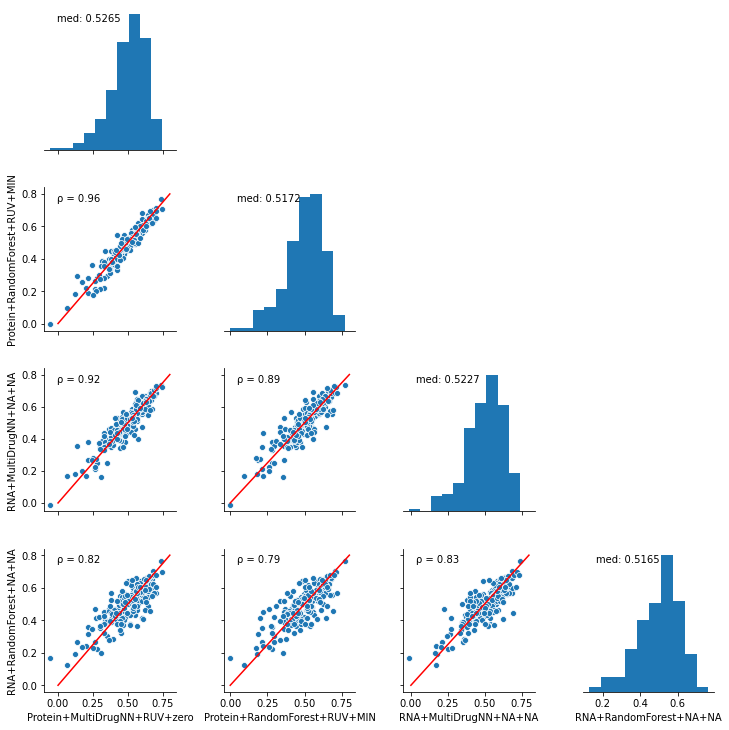

In [442]:
g = sns.pairplot(test_corr_df_included_pivot, corner=True)
g.map_diag(medianfunc)
g.map_lower(corrfunc)
plt.show()

#### min 300

In [76]:
test_corr_df_300 = test_corr_df[test_corr_df['min_cell_line']==300]

In [77]:
test_corr_df_included = test_corr_df_300[test_corr_df_300['key'].isin(model_included)]

Text(0, 0.5, 'Protein+MultiDrugNN+RUV+zero')

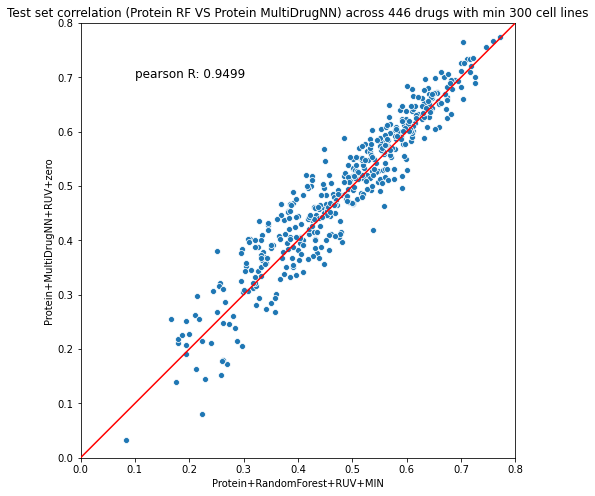

In [152]:
plt.figure(figsize=(12, 8))
model_0 = 'Protein+RandomForest+RUV+MIN'
model_1 = 'Protein+MultiDrugNN+RUV+zero'
r = pearsonr(
    test_corr_df_included[test_corr_df_included['key'] == model_0]
    ['test_corr'].values, test_corr_df_included[
        test_corr_df_included['key'] == model_1]['test_corr'].values)[0]
g = sns.scatterplot(x=test_corr_df_included[test_corr_df_included['key'] ==
                                            model_0]['test_corr'].values,
                    y=test_corr_df_included[test_corr_df_included['key'] ==
                                            model_1]['test_corr'].values)
g.plot((0, 0.8), (0, 0.8), color='red', zorder=10)
g.set_xlim(0, 0.8)
g.set_ylim(0, 0.8)
g.set_aspect('equal')
g.text(0.1, 0.7, f"pearson R: {r:0.4f}", fontsize=12)
plt.title('Test set correlation (Protein RF VS Protein MultiDrugNN) across 446 drugs with min 300 cell lines')
plt.xlabel(model_0)
plt.ylabel(model_1)

Text(0, 0.5, 'Protein+MultiDrugNN+RUV+zero')

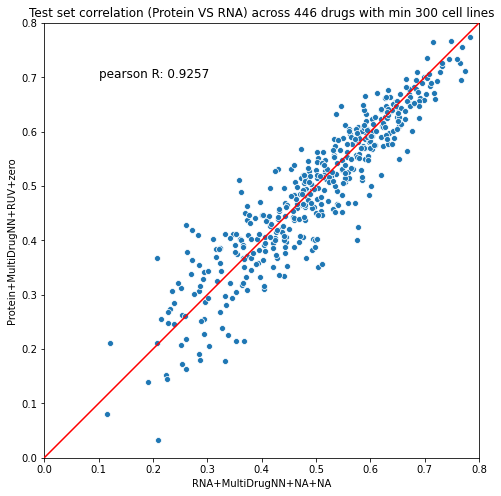

In [153]:
plt.figure(figsize=(12, 8))
model_0 = 'RNA+MultiDrugNN+NA+NA'
model_1 = 'Protein+MultiDrugNN+RUV+zero'
r = pearsonr(
    test_corr_df_included[test_corr_df_included['key'] == model_0]
    ['test_corr'].values, test_corr_df_included[
        test_corr_df_included['key'] == model_1]['test_corr'].values)[0]
g = sns.scatterplot(x=test_corr_df_included[test_corr_df_included['key'] ==
                                            model_0]['test_corr'].values,
                    y=test_corr_df_included[test_corr_df_included['key'] ==
                                            model_1]['test_corr'].values)
g.plot((0, 0.8), (0, 0.8), color='red', zorder=10)
g.set_xlim(0, 0.8)
g.set_ylim(0, 0.8)
g.set_aspect('equal')
g.text(0.1, 0.7, f"pearson R: {r:0.4f}", fontsize=12)
plt.title('Test set correlation (Protein VS RNA) across 446 drugs with min 300 cell lines')
plt.xlabel(model_0)
plt.ylabel(model_1)

In [445]:
test_corr_df_included = test_corr_df_included[['Drug Id', 'key', 'test_corr']]
test_corr_df_included_pivot = pd.pivot(test_corr_df_included,
                                       index='Drug Id',
                                       columns='key',
                                       values='test_corr')

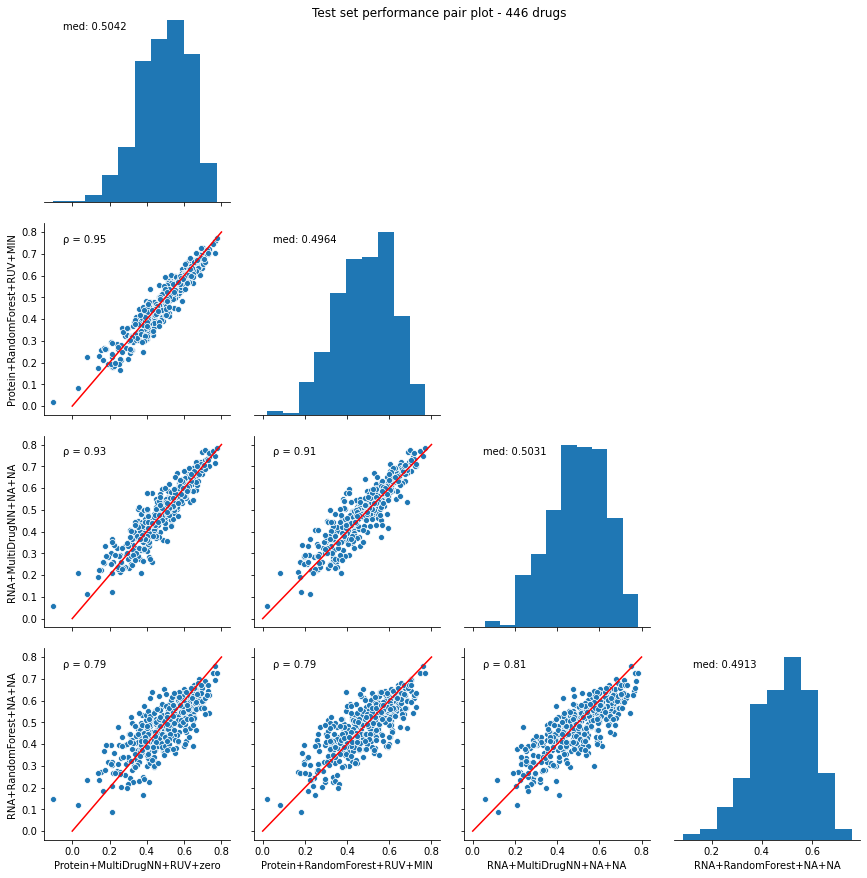

In [459]:
g = sns.pairplot(test_corr_df_included_pivot, corner=True, size=3)
g.map_diag(medianfunc)
g.map_lower(corrfunc)
g.fig.suptitle("Test set performance pair plot - 446 drugs", y=1) # y= some height>1

plt.show()

## CV

In [29]:
col = ['Drug Id', 'val_score']

In [30]:
df_list = []

In [31]:
min_cell_line = 900
scores_rf_tissue = pd.read_csv("../work_dirs/meta_info/tissue_ic50/RandomForest/scores_202004041845_900.csv")[col]
scores_rf_tissue['model'] = 'RandomForest'
scores_rf_tissue['data'] = 'Tissue'

scores_en_rna = pd.read_csv("../work_dirs/rna_norm/ElasticNet/scores_202004032156_rna_900.csv")[col]
scores_en_rna['model'] = 'ElasticNet'
scores_en_rna['data'] = 'RNA'

scores_svm_rna = pd.read_csv("../work_dirs/rna_norm/SVM/scores_202004040136_rna_900.csv")[col]
scores_svm_rna['model'] = 'SVM'
scores_svm_rna['data'] = 'RNA'

scores_rf_rna = pd.read_csv("../work_dirs/rna_norm/RandomForest/scores_202004071545_rna_900.csv")[col]
scores_rf_rna['model'] = 'RandomForest'
scores_rf_rna['data'] = 'RNA'

tmp_df = pd.concat([scores_rf_tissue, scores_en_rna, scores_svm_rna, scores_rf_rna])
tmp_df['min_cell_line'] = min_cell_line
tmp_df['normalisation'] = 'NA'
tmp_df['imputation'] = 'NA'

df_list.append(tmp_df)

In [32]:
scores_svm_protein = pd.read_csv("../work_dirs/protein_norm/SVM/scores_202004032216_ruv_zero_900.csv")[col]
scores_svm_protein['model'] = 'SVM'

scores_rf_protein = pd.read_csv("../work_dirs/protein_norm/RandomForest/scores_202004032212_ruv_zero_900.csv")[col]
scores_rf_protein['model'] = 'RandomForest'

tmp_df = pd.concat([scores_svm_protein, scores_rf_protein])
tmp_df['min_cell_line'] = min_cell_line
tmp_df['normalisation'] = 'RUV'
tmp_df['data'] = 'Protein'
tmp_df['imputation'] = 'zero'

df_list.append(tmp_df)

scores_svm_protein = pd.read_csv("../work_dirs/protein_norm/SVM/scores_202004040237_ruv_zero_900_median.csv")[col]
scores_svm_protein['model'] = 'SVM'

scores_rf_protein = pd.read_csv("../work_dirs/protein_norm/RandomForest/scores_202004040240_ruv_zero_900_median.csv")[col]
scores_rf_protein['model'] = 'RandomForest'

tmp_df = pd.concat([scores_svm_protein, scores_rf_protein])
tmp_df['min_cell_line'] = min_cell_line
tmp_df['normalisation'] = 'Median'
tmp_df['data'] = 'Protein'
tmp_df['imputation'] = 'zero'

df_list.append(tmp_df)

scores_en_protein = pd.read_csv("../work_dirs/protein_norm/ElasticNet/scores_202004041130_ruv_zero_900_rawmedian.csv")[col]
scores_en_protein['model'] = 'ElasticNet'

scores_svm_protein = pd.read_csv("../work_dirs/protein_norm/SVM/scores_202004041128_ruv_zero_900_rawmedian.csv")[col]
scores_svm_protein['model'] = 'SVM'

scores_rf_protein = pd.read_csv("../work_dirs/protein_norm/RandomForest/scores_202004041129_ruv_zero_900_rawmedian.csv")[col]
scores_rf_protein['model'] = 'RandomForest'

tmp_df = pd.concat([scores_svm_protein, scores_rf_protein])
tmp_df['min_cell_line'] = min_cell_line
tmp_df['normalisation'] = 'Raw-Median'
tmp_df['data'] = 'Protein'
tmp_df['imputation'] = 'zero'

df_list.append(tmp_df)


scores_svm_protein = pd.read_csv("../work_dirs/protein_norm/SVM/scores_202004041841_ruv_knn_900.csv")[col]
scores_svm_protein['model'] = 'SVM'

scores_rf_protein = pd.read_csv("../work_dirs/protein_norm/RandomForest/scores_202004041839_ruv_knn_900.csv")[col]
scores_rf_protein['model'] = 'RandomForest'

tmp_df = pd.concat([scores_svm_protein, scores_rf_protein])
tmp_df['min_cell_line'] = min_cell_line
tmp_df['normalisation'] = 'RUV'
tmp_df['data'] = 'Protein'
tmp_df['imputation'] = 'KNN'

df_list.append(tmp_df)

In [33]:
scores_multi_rna = pd.read_csv(
    "../work_dirs/rna_norm/MultiDrug/scores_202004092336_res_900_14000.csv"
)
scores_multi_rna_norm_val = scores_multi_rna[
    scores_multi_rna['run'] != 'test'].reset_index(drop=True).rename(
        columns={'corr': 'val_score'})
scores_multi_rna_norm_val = scores_multi_rna_norm_val.groupby(
    ['Drug Id', 'epoch']).mean().reset_index()
tmp_df = scores_multi_rna_norm_val[scores_multi_rna_norm_val['epoch']
                                       == 60][col].reset_index(drop=True)
tmp_df['min_cell_line'] = min_cell_line
tmp_df['normalisation'] = 'NA'
tmp_df['data'] = 'RNA'
tmp_df['imputation'] = 'NA'
tmp_df['model'] = 'MultiDrugNN'
df_list.append(tmp_df)

scores_multi_protein = pd.read_csv(
    "../work_dirs/protein_norm/MultiDrug/scores_202004031435_resx_ruv_mv_900.csv"
)
scores_multi_protein_norm_val = scores_multi_protein[
    scores_multi_protein['run'] != 'test'].reset_index(drop=True).rename(
        columns={'corr': 'val_score'})
scores_multi_protein_norm_val = scores_multi_protein_norm_val.groupby(
    ['Drug Id', 'epoch']).mean().reset_index()
tmp_df = scores_multi_protein_norm_val[scores_multi_protein_norm_val['epoch']
                                       == 130][col].reset_index(drop=True)
tmp_df['min_cell_line'] = min_cell_line
tmp_df['normalisation'] = 'RUV'
tmp_df['data'] = 'Protein'
tmp_df['imputation'] = 'zero'
tmp_df['model'] = 'MultiDrugNN'
df_list.append(tmp_df)

scores_multi_protein = pd.read_csv(
    "../work_dirs/protein_norm/MultiDrug/scores_202004040153_resx_ruv_mv_900_median.csv"
)
scores_multi_protein_norm_val = scores_multi_protein[
    scores_multi_protein['run'] != 'test'].reset_index(drop=True).rename(
        columns={'corr': 'val_score'})
scores_multi_protein_norm_val = scores_multi_protein_norm_val.groupby(
    ['Drug Id', 'epoch']).mean().reset_index()
tmp_df = scores_multi_protein_norm_val[scores_multi_protein_norm_val['epoch']
                                       == 140][col].reset_index(drop=True)
tmp_df['min_cell_line'] = min_cell_line
tmp_df['normalisation'] = 'Median'
tmp_df['data'] = 'Protein'
tmp_df['model'] = 'MultiDrugNN'
tmp_df['imputation'] = 'zero'
df_list.append(tmp_df)

scores_multi_protein = pd.read_csv(
    "../work_dirs/protein_norm/MultiDrug/scores_202004041127_resx_ruv_mv_900_rawmedian.csv"
)
scores_multi_protein_norm_val = scores_multi_protein[
    scores_multi_protein['run'] != 'test'].reset_index(drop=True).rename(
        columns={'corr': 'val_score'})

scores_multi_protein_norm_val = scores_multi_protein_norm_val.groupby(
    ['Drug Id', 'epoch']).mean().reset_index()
tmp_df = scores_multi_protein_norm_val[scores_multi_protein_norm_val['epoch']
                                       == 120][col].reset_index(drop=True)
tmp_df['min_cell_line'] = min_cell_line
tmp_df['normalisation'] = 'Raw-Median'
tmp_df['data'] = 'Protein'
tmp_df['imputation'] = 'zero'
tmp_df['model'] = 'MultiDrugNN'
df_list.append(tmp_df)

scores_multi_protein = pd.read_csv(
    "../work_dirs/protein_norm/MultiDrug/scores_202004041833_resx_ruv_knn_900.csv"
)
scores_multi_protein_norm_val = scores_multi_protein[
    scores_multi_protein['run'] != 'test'].reset_index(drop=True).rename(
        columns={'corr': 'val_score'})

scores_multi_protein_norm_val = scores_multi_protein_norm_val.groupby(
    ['Drug Id', 'epoch']).mean().reset_index()
tmp_df = scores_multi_protein_norm_val[scores_multi_protein_norm_val['epoch']
                                       == 130][col].reset_index(drop=True)
tmp_df['min_cell_line'] = min_cell_line
tmp_df['normalisation'] = 'RUV'
tmp_df['data'] = 'Protein'
tmp_df['imputation'] = 'KNN'
tmp_df['model'] = 'MultiDrugNN'
df_list.append(tmp_df)

In [34]:
min_cell_line = 300

scores_rf_tissue = pd.read_csv("../work_dirs/meta_info/tissue_ic50/RandomForest/scores_202004041844_300.csv")[col]
scores_rf_tissue['model'] = 'RandomForest'
scores_rf_tissue['data'] = 'Tissue'

scores_en_rna = pd.read_csv("../work_dirs/rna_norm/ElasticNet/scores_202004032156_rna_300.csv")[col]
scores_en_rna['model'] = 'ElasticNet'
scores_en_rna['data'] = 'RNA'

scores_svm_rna = pd.read_csv("../work_dirs/rna_norm/SVM/scores_202004040135_rna_300.csv")[col]
scores_svm_rna['model'] = 'SVM'
scores_svm_rna['data'] = 'RNA'

scores_rf_rna = pd.read_csv("../work_dirs/rna_norm/RandomForest/scores_202004071545_rna_300.csv")[col]
scores_rf_rna['model'] = 'RandomForest'
scores_rf_rna['data'] = 'RNA'


tmp_df = pd.concat([scores_rf_tissue, scores_en_rna, scores_svm_rna, scores_rf_rna])
tmp_df['min_cell_line'] = min_cell_line
tmp_df['normalisation'] = 'NA'
tmp_df['imputation'] = 'NA'

df_list.append(tmp_df)

scores_en_protein = pd.read_csv("../work_dirs/protein_norm/ElasticNet/scores_202004032214_ruv_zero_300.csv")[col]
scores_en_protein['model'] = 'ElasticNet'

scores_svm_protein = pd.read_csv("../work_dirs/protein_norm/SVM/scores_202004032217_ruv_zero_300.csv")[col]
scores_svm_protein['model'] = 'SVM'

scores_rf_protein = pd.read_csv("../work_dirs/protein_norm/RandomForest/scores_202004032212_ruv_zero_300.csv")[col]
scores_rf_protein['model'] = 'RandomForest'

tmp_df = pd.concat([scores_svm_protein, scores_rf_protein])
tmp_df['min_cell_line'] = min_cell_line
tmp_df['normalisation'] = 'RUV'
tmp_df['data'] = 'Protein'
tmp_df['imputation'] = 'zero'

df_list.append(tmp_df)

scores_en_protein = pd.read_csv("../work_dirs/protein_norm/ElasticNet/scores_202004040238_ruv_zero_300_median.csv")[col]
scores_en_protein['model'] = 'ElasticNet'

scores_svm_protein = pd.read_csv("../work_dirs/protein_norm/SVM/scores_202004040236_ruv_zero_300_median.csv")[col]
scores_svm_protein['model'] = 'SVM'

scores_rf_protein = pd.read_csv("../work_dirs/protein_norm/RandomForest/scores_202004040239_ruv_zero_300_median.csv")[col]
scores_rf_protein['model'] = 'RandomForest'

tmp_df = pd.concat([scores_svm_protein, scores_rf_protein])
tmp_df['min_cell_line'] = min_cell_line
tmp_df['normalisation'] = 'Median'
tmp_df['data'] = 'Protein'
tmp_df['imputation'] = 'zero'

df_list.append(tmp_df)


scores_svm_protein = pd.read_csv(
    "../work_dirs/protein_norm/SVM/scores_202004041128_ruv_zero_300_rawmedian.csv"
)[col]
scores_svm_protein['model'] = 'SVM'

scores_rf_protein = pd.read_csv(
    "../work_dirs/protein_norm/RandomForest/scores_202004041129_ruv_zero_300_rawmedian.csv"
)[col]
scores_rf_protein['model'] = 'RandomForest'

tmp_df = pd.concat([scores_svm_protein, scores_rf_protein])
tmp_df['min_cell_line'] = min_cell_line
tmp_df['normalisation'] = 'Raw-Median'
tmp_df['data'] = 'Protein'
tmp_df['imputation'] = 'zero'

df_list.append(tmp_df)

scores_en_protein = pd.read_csv("../work_dirs/protein_norm/ElasticNet/scores_202004041834_ruv_knn_300.csv")[col]
scores_en_protein['model'] = 'ElasticNet'

scores_svm_protein = pd.read_csv("../work_dirs/protein_norm/SVM/scores_202004041840_ruv_knn_300.csv")[col]
scores_svm_protein['model'] = 'SVM'

scores_rf_protein = pd.read_csv("../work_dirs/protein_norm/RandomForest/scores_202004041838_ruv_knn_300.csv")[col]
scores_rf_protein['model'] = 'RandomForest'

tmp_df = pd.concat([scores_svm_protein, scores_rf_protein])
tmp_df['min_cell_line'] = min_cell_line
tmp_df['normalisation'] = 'RUV'
tmp_df['data'] = 'Protein'
tmp_df['imputation'] = 'KNN'

df_list.append(tmp_df)

In [35]:
scores_multi_rna = pd.read_csv(
    "../work_dirs/rna_norm/MultiDrug/scores_202004092336_res_300_14000.csv"
)
scores_multi_rna_norm_val = scores_multi_rna[
    scores_multi_rna['run'] != 'test'].reset_index(drop=True).rename(
        columns={'corr': 'val_score'})
scores_multi_rna_norm_val = scores_multi_rna_norm_val.groupby(
    ['Drug Id', 'epoch']).mean().reset_index()
tmp_df = scores_multi_rna_norm_val[scores_multi_rna_norm_val['epoch']
                                       == 60][col].reset_index(drop=True)
tmp_df['min_cell_line'] = min_cell_line
tmp_df['normalisation'] = 'NA'
tmp_df['data'] = 'RNA'
tmp_df['imputation'] = 'NA'
tmp_df['model'] = 'MultiDrugNN'
df_list.append(tmp_df)

scores_multi_protein = pd.read_csv(
    "../work_dirs/protein_norm/MultiDrug/scores_202004031434_resx_ruv_mv_300.csv"
)
scores_multi_protein_norm_val = scores_multi_protein[
    scores_multi_protein['run'] != 'test'].reset_index(drop=True).rename(
        columns={'corr': 'val_score'})
scores_multi_protein_norm_val = scores_multi_protein_norm_val.groupby(
    ['Drug Id', 'epoch']).mean().reset_index()
tmp_df = scores_multi_protein_norm_val[scores_multi_protein_norm_val['epoch']
                                       == 180][col].reset_index(drop=True)
tmp_df['min_cell_line'] = min_cell_line
tmp_df['normalisation'] = 'RUV'
tmp_df['data'] = 'Protein'
tmp_df['imputation'] = 'zero'
tmp_df['model'] = 'MultiDrugNN'
df_list.append(tmp_df)

scores_multi_protein = pd.read_csv(
    "../work_dirs/protein_norm/MultiDrug/scores_202004040154_resx_ruv_mv_300_median.csv"
)
scores_multi_protein_norm_val = scores_multi_protein[
    scores_multi_protein['run'] != 'test'].reset_index(drop=True).rename(
        columns={'corr': 'val_score'})
scores_multi_protein_norm_val = scores_multi_protein_norm_val.groupby(
    ['Drug Id', 'epoch']).mean().reset_index()
tmp_df = scores_multi_protein_norm_val[scores_multi_protein_norm_val['epoch']
                                       == 180][col].reset_index(drop=True)
tmp_df['min_cell_line'] = min_cell_line
tmp_df['normalisation'] = 'Median'
tmp_df['data'] = 'Protein'
tmp_df['imputation'] = 'zero'
tmp_df['model'] = 'MultiDrugNN'
df_list.append(tmp_df)

scores_multi_protein = pd.read_csv(
    "../work_dirs/protein_norm/MultiDrug/scores_202004041128_resx_ruv_mv_300_rawmedian.csv"
)
scores_multi_protein_norm_val = scores_multi_protein[
    scores_multi_protein['run'] != 'test'].reset_index(drop=True).rename(
        columns={'corr': 'val_score'})

scores_multi_protein_norm_val = scores_multi_protein_norm_val.groupby(
    ['Drug Id', 'epoch']).mean().reset_index()
tmp_df = scores_multi_protein_norm_val[scores_multi_protein_norm_val['epoch']
                                       == 180][col].reset_index(drop=True)
tmp_df['min_cell_line'] = min_cell_line
tmp_df['normalisation'] = 'Raw-Median'
tmp_df['data'] = 'Protein'
tmp_df['imputation'] = 'zero'
tmp_df['model'] = 'MultiDrugNN'
df_list.append(tmp_df)

scores_multi_protein = pd.read_csv(
    "../work_dirs/protein_norm/MultiDrug/scores_202004041832_resx_ruv_knn_300.csv"
)
scores_multi_protein_norm_val = scores_multi_protein[
    scores_multi_protein['run'] != 'test'].reset_index(drop=True).rename(
        columns={'corr': 'val_score'})

scores_multi_protein_norm_val = scores_multi_protein_norm_val.groupby(
    ['Drug Id', 'epoch']).mean().reset_index()
tmp_df = scores_multi_protein_norm_val[scores_multi_protein_norm_val['epoch']
                                       == 180][col].reset_index(drop=True)
tmp_df['min_cell_line'] = min_cell_line
tmp_df['normalisation'] = 'RUV'
tmp_df['data'] = 'Protein'
tmp_df['imputation'] = 'KNN'
tmp_df['model'] = 'MultiDrugNN'
df_list.append(tmp_df)

In [36]:
val_corr_all = pd.concat(df_list).groupby(
    ['data', 'model', 'normalisation',
     'imputation','min_cell_line'])['val_score'].median().reset_index()

### swarm plots

In [37]:
val_corr_df = pd.concat(df_list)

In [75]:
val_corr_df['key'] = val_corr_df.apply(
    lambda row:
    f"{row['data']}+{row['model'].replace(' ', '_')}+{row['normalisation']}+{row['imputation']}", axis=1)

In [76]:
val_corr_df['key'].unique()

array(['Tissue+RandomForest+NA+NA', 'RNA+ElasticNet+NA+NA',
       'RNA+SVM+NA+NA', 'RNA+RandomForest+NA+NA', 'Protein+SVM+RUV+zero',
       'Protein+RandomForest+RUV+zero', 'Protein+SVM+Median+zero',
       'Protein+RandomForest+Median+zero', 'Protein+SVM+Raw-Median+zero',
       'Protein+RandomForest+Raw-Median+zero', 'Protein+SVM+RUV+KNN',
       'Protein+RandomForest+RUV+KNN', 'RNA+MultiDrugNN+NA+NA',
       'Protein+MultiDrugNN+RUV+zero', 'Protein+MultiDrugNN+Median+zero',
       'Protein+MultiDrugNN+Raw-Median+zero',
       'Protein+MultiDrugNN+RUV+KNN'], dtype=object)

In [77]:
model_included = [
    'Tissue+RandomForest+NA+NA', 'RNA+ElasticNet+NA+NA','RNA_common+RandomForest+NA+NA',
    'RNA+RandomForest+NA+NA', 'Protein+RandomForest+RUV+MIN',
    'RNA+MultiDrugNN+NA+NA',
    'Protein+MultiDrugNN+RUV+zero'
]

#### min 900

In [78]:
val_corr_df_900 = val_corr_df[val_corr_df['min_cell_line']==900]

In [80]:
val_corr_df_included = val_corr_df_900[val_corr_df_900['key'].isin(model_included)]

Text(0.5, 1.0, 'CV correlation on 212 drugs')

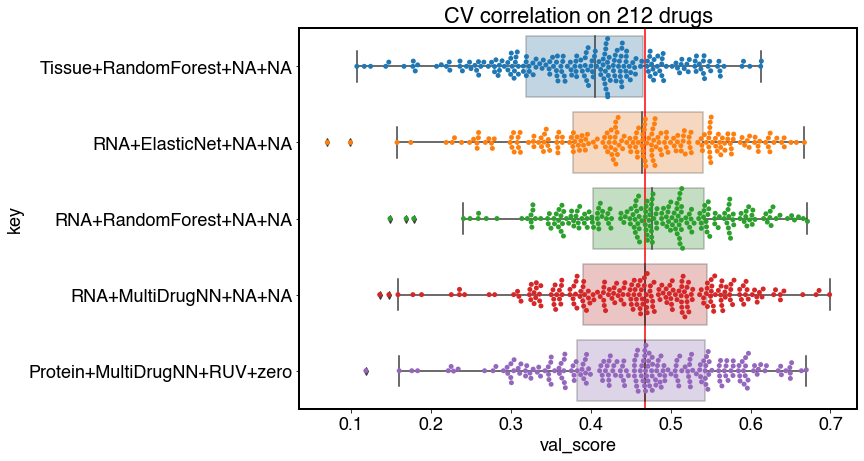

In [104]:
plt.figure(figsize=(10, 7))
ax = sns.boxplot('val_score',
                 'key',
                 data=val_corr_df_included,
                 orient='h',
                 boxprops=dict(alpha=.3))
sns.swarmplot('val_score', 'key', data=val_corr_df_included, orient='h')
x = val_corr_df_included[val_corr_df_included['key']=='Protein+MultiDrugNN+RUV+zero']['val_score'].median()
plt.plot([x, x], [-0.5,5.5], color='red')
plt.title("CV correlation on 212 drugs")

#### min 300

In [105]:
val_corr_df_300 = val_corr_df[val_corr_df['min_cell_line']==300]

In [106]:
val_corr_df_included = val_corr_df_300[val_corr_df_300['key'].isin(model_included)]

Text(0.5, 1.0, 'CV correlation on 446 drugs')

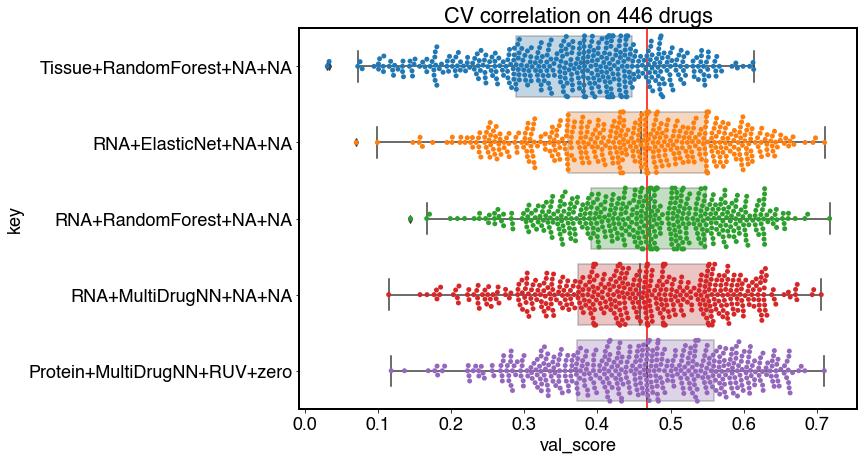

In [107]:
plt.figure(figsize=(10, 7))
ax = sns.boxplot('val_score',
                 'key',
                 data=val_corr_df_included,
                 orient='h',
                 boxprops=dict(alpha=.3))
sns.swarmplot('val_score', 'key', data=val_corr_df_included, orient='h')
x = val_corr_df_included[val_corr_df_included['key']=='Protein+MultiDrugNN+RUV+zero']['val_score'].median()
plt.plot([x, x], [-0.5,5.5], color='red')
plt.title("CV correlation on 446 drugs")

## CV bar plot

In [38]:
model_included = [
    'Tissue+RandomForest+NA+NA', 'RNA+ElasticNet+NA+NA',
    'RNA_common+RandomForest+NA+NA', 'RNA+RandomForest+NA+NA',
    'Protein+RandomForest+RUV+MIN', 'RNA+MultiDrugNN+NA+NA',
    'Protein+MultiDrugNN+RUV+zero'
]

### min 900

In [39]:
col = ['Drug Id', 'cv0_corr','cv1_corr','cv2_corr','cv3_corr','cv4_corr']

In [40]:
df_list = []

In [41]:
min_cell_line = 900
scores_rf_tissue = pd.read_csv("../work_dirs/meta_info/tissue_ic50/RandomForest/scores_202004041845_900.csv")[col]
scores_rf_tissue = pd.melt(
    scores_rf_tissue,
    id_vars='Drug Id',
    value_vars=['cv0_corr', 'cv1_corr', 'cv2_corr', 'cv3_corr', 'cv4_corr'],
    var_name='run',
    value_name='val_score')
scores_rf_tissue['model'] = 'RandomForest'
scores_rf_tissue['data'] = 'Tissue'

scores_en_rna = pd.read_csv("../work_dirs/rna_norm/ElasticNet/scores_202004032156_rna_900.csv")[col]
scores_en_rna = pd.melt(
    scores_en_rna,
    id_vars='Drug Id',
    value_vars=['cv0_corr', 'cv1_corr', 'cv2_corr', 'cv3_corr', 'cv4_corr'],
    var_name='run',
    value_name='val_score')
scores_en_rna['model'] = 'ElasticNet'
scores_en_rna['data'] = 'RNA'

scores_svm_rna = pd.read_csv("../work_dirs/rna_norm/SVM/scores_202004040136_rna_900.csv")[col]
scores_svm_rna = pd.melt(
    scores_svm_rna,
    id_vars='Drug Id',
    value_vars=['cv0_corr', 'cv1_corr', 'cv2_corr', 'cv3_corr', 'cv4_corr'],
    var_name='run',
    value_name='val_score')
scores_svm_rna['model'] = 'SVM'
scores_svm_rna['data'] = 'RNA'

scores_rf_rna_common = pd.read_csv("../work_dirs/rna_common_norm/RandomForest/scores_202004081136_rna_900.csv")[col]
scores_rf_rna_common = pd.melt(
    scores_rf_rna_common,
    id_vars='Drug Id',
    value_vars=['cv0_corr', 'cv1_corr', 'cv2_corr', 'cv3_corr', 'cv4_corr'],
    var_name='run',
    value_name='val_score')
scores_rf_rna_common['model'] = 'RandomForest'
scores_rf_rna_common['data'] = 'RNA_common'

scores_rf_rna = pd.read_csv("../work_dirs/rna_norm/RandomForest/scores_202004071545_rna_900.csv")[col]
scores_rf_rna = pd.melt(
    scores_rf_rna,
    id_vars='Drug Id',
    value_vars=['cv0_corr', 'cv1_corr', 'cv2_corr', 'cv3_corr', 'cv4_corr'],
    var_name='run',
    value_name='val_score')
scores_rf_rna['model'] = 'RandomForest'
scores_rf_rna['data'] = 'RNA'

tmp_df = pd.concat([scores_rf_tissue, scores_en_rna, scores_svm_rna, scores_rf_rna_common, scores_rf_rna])
tmp_df['min_cell_line'] = min_cell_line
tmp_df['normalisation'] = 'NA'
tmp_df['imputation'] = 'NA'

df_list.append(tmp_df)

In [42]:
scores_svm_protein = pd.read_csv("../work_dirs/protein_norm/SVM/scores_202004032216_ruv_zero_900.csv")[col]
scores_svm_protein = pd.melt(
    scores_svm_protein,
    id_vars='Drug Id',
    value_vars=['cv0_corr', 'cv1_corr', 'cv2_corr', 'cv3_corr', 'cv4_corr'],
    var_name='run',
    value_name='val_score')
scores_svm_protein['model'] = 'SVM'

scores_rf_protein = pd.read_csv("../work_dirs/protein_norm/RandomForest/scores_202004032212_ruv_zero_900.csv")[col]
scores_rf_protein = pd.melt(
    scores_rf_protein,
    id_vars='Drug Id',
    value_vars=['cv0_corr', 'cv1_corr', 'cv2_corr', 'cv3_corr', 'cv4_corr'],
    var_name='run',
    value_name='val_score')
scores_rf_protein['model'] = 'RandomForest'

tmp_df = pd.concat([scores_svm_protein, scores_rf_protein])
tmp_df['min_cell_line'] = min_cell_line
tmp_df['normalisation'] = 'RUV'
tmp_df['data'] = 'Protein'
tmp_df['imputation'] = 'zero'

df_list.append(tmp_df)

scores_svm_protein = pd.read_csv("../work_dirs/protein_norm/SVM/scores_202004040237_ruv_zero_900_median.csv")[col]
scores_svm_protein = pd.melt(
    scores_svm_protein,
    id_vars='Drug Id',
    value_vars=['cv0_corr', 'cv1_corr', 'cv2_corr', 'cv3_corr', 'cv4_corr'],
    var_name='run',
    value_name='val_score')
scores_svm_protein['model'] = 'SVM'

scores_rf_protein = pd.read_csv("../work_dirs/protein_norm/RandomForest/scores_202004040240_ruv_zero_900_median.csv")[col]
scores_rf_protein = pd.melt(
    scores_rf_protein,
    id_vars='Drug Id',
    value_vars=['cv0_corr', 'cv1_corr', 'cv2_corr', 'cv3_corr', 'cv4_corr'],
    var_name='run',
    value_name='val_score')
scores_rf_protein['model'] = 'RandomForest'

tmp_df = pd.concat([scores_svm_protein, scores_rf_protein])
tmp_df['min_cell_line'] = min_cell_line
tmp_df['normalisation'] = 'Median'
tmp_df['data'] = 'Protein'
tmp_df['imputation'] = 'zero'

df_list.append(tmp_df)

scores_en_protein = pd.read_csv("../work_dirs/protein_norm/ElasticNet/scores_202004041130_ruv_zero_900_rawmedian.csv")[col]
scores_en_protein = pd.melt(
    scores_en_protein,
    id_vars='Drug Id',
    value_vars=['cv0_corr', 'cv1_corr', 'cv2_corr', 'cv3_corr', 'cv4_corr'],
    var_name='run',
    value_name='val_score')
scores_en_protein['model'] = 'ElasticNet'

scores_svm_protein = pd.read_csv("../work_dirs/protein_norm/SVM/scores_202004041128_ruv_zero_900_rawmedian.csv")[col]
scores_svm_protein = pd.melt(
    scores_svm_protein,
    id_vars='Drug Id',
    value_vars=['cv0_corr', 'cv1_corr', 'cv2_corr', 'cv3_corr', 'cv4_corr'],
    var_name='run',
    value_name='val_score')
scores_svm_protein['model'] = 'SVM'

scores_rf_protein = pd.read_csv("../work_dirs/protein_norm/RandomForest/scores_202004041129_ruv_zero_900_rawmedian.csv")[col]
scores_rf_protein = pd.melt(
    scores_rf_protein,
    id_vars='Drug Id',
    value_vars=['cv0_corr', 'cv1_corr', 'cv2_corr', 'cv3_corr', 'cv4_corr'],
    var_name='run',
    value_name='val_score')
scores_rf_protein['model'] = 'RandomForest'

tmp_df = pd.concat([scores_svm_protein, scores_rf_protein])
tmp_df['min_cell_line'] = min_cell_line
tmp_df['normalisation'] = 'Raw-Median'
tmp_df['data'] = 'Protein'
tmp_df['imputation'] = 'zero'

df_list.append(tmp_df)


scores_svm_protein = pd.read_csv("../work_dirs/protein_norm/SVM/scores_202004041841_ruv_knn_900.csv")[col]
scores_svm_protein = pd.melt(
    scores_svm_protein,
    id_vars='Drug Id',
    value_vars=['cv0_corr', 'cv1_corr', 'cv2_corr', 'cv3_corr', 'cv4_corr'],
    var_name='run',
    value_name='val_score')
scores_svm_protein['model'] = 'SVM'

scores_rf_protein = pd.read_csv("../work_dirs/protein_norm/RandomForest/scores_202004041839_ruv_knn_900.csv")[col]
scores_rf_protein = pd.melt(
    scores_rf_protein,
    id_vars='Drug Id',
    value_vars=['cv0_corr', 'cv1_corr', 'cv2_corr', 'cv3_corr', 'cv4_corr'],
    var_name='run',
    value_name='val_score')
scores_rf_protein['model'] = 'RandomForest'

tmp_df = pd.concat([scores_svm_protein, scores_rf_protein])
tmp_df['min_cell_line'] = min_cell_line
tmp_df['normalisation'] = 'RUV'
tmp_df['data'] = 'Protein'
tmp_df['imputation'] = 'KNN'

df_list.append(tmp_df)


scores_rf_protein = pd.read_csv("../work_dirs/protein_norm/RandomForest/scores_202004101253_ruv_min_900.csv")[col]
scores_rf_protein = pd.melt(
    scores_rf_protein,
    id_vars='Drug Id',
    value_vars=['cv0_corr', 'cv1_corr', 'cv2_corr', 'cv3_corr', 'cv4_corr'],
    var_name='run',
    value_name='val_score')
scores_rf_protein['model'] = 'RandomForest'

tmp_df = pd.concat([scores_rf_protein])
tmp_df['min_cell_line'] = min_cell_line
tmp_df['normalisation'] = 'RUV'
tmp_df['data'] = 'Protein'
tmp_df['imputation'] = 'MIN'

df_list.append(tmp_df)

In [43]:
col = ['Drug Id','run','val_score']

scores_multi_rna = pd.read_csv(
    "../work_dirs/rna_norm/MultiDrug/scores_202004092336_res_900_14000.csv"
)
scores_multi_rna_norm_val = scores_multi_rna[
    scores_multi_rna['run'] != 'test'].reset_index(drop=True).rename(
        columns={'corr': 'val_score'})

tmp_df = scores_multi_rna_norm_val[scores_multi_rna_norm_val['epoch']
                                       == 60][col].reset_index(drop=True)
tmp_df['min_cell_line'] = min_cell_line
tmp_df['normalisation'] = 'NA'
tmp_df['data'] = 'RNA'
tmp_df['imputation'] = 'NA'
tmp_df['model'] = 'MultiDrugNN'
df_list.append(tmp_df)


scores_multi_protein = pd.read_csv(
    "../work_dirs/protein_norm/MultiDrug/scores_202004031435_resx_ruv_mv_900.csv"
)
scores_multi_protein_norm_val = scores_multi_protein[
    scores_multi_protein['run'] != 'test'].reset_index(drop=True).rename(
        columns={'corr': 'val_score'})

tmp_df = scores_multi_protein_norm_val[scores_multi_protein_norm_val['epoch']
                                       == 130][col].reset_index(drop=True)
tmp_df['min_cell_line'] = min_cell_line
tmp_df['normalisation'] = 'RUV'
tmp_df['data'] = 'Protein'
tmp_df['imputation'] = 'zero'
tmp_df['model'] = 'MultiDrugNN'
df_list.append(tmp_df)

scores_multi_protein = pd.read_csv(
    "../work_dirs/protein_norm/MultiDrug/scores_202004040153_resx_ruv_mv_900_median.csv"
)
scores_multi_protein_norm_val = scores_multi_protein[
    scores_multi_protein['run'] != 'test'].reset_index(drop=True).rename(
        columns={'corr': 'val_score'})
tmp_df = scores_multi_protein_norm_val[scores_multi_protein_norm_val['epoch']
                                       == 140][col].reset_index(drop=True)
tmp_df['min_cell_line'] = min_cell_line
tmp_df['normalisation'] = 'Median'
tmp_df['data'] = 'Protein'
tmp_df['model'] = 'MultiDrugNN'
tmp_df['imputation'] = 'zero'
df_list.append(tmp_df)

scores_multi_protein = pd.read_csv(
    "../work_dirs/protein_norm/MultiDrug/scores_202004041127_resx_ruv_mv_900_rawmedian.csv"
)
scores_multi_protein_norm_val = scores_multi_protein[
    scores_multi_protein['run'] != 'test'].reset_index(drop=True).rename(
        columns={'corr': 'val_score'})


tmp_df = scores_multi_protein_norm_val[scores_multi_protein_norm_val['epoch']
                                       == 120][col].reset_index(drop=True)
tmp_df['min_cell_line'] = min_cell_line
tmp_df['normalisation'] = 'Raw-Median'
tmp_df['data'] = 'Protein'
tmp_df['imputation'] = 'zero'
tmp_df['model'] = 'MultiDrugNN'
df_list.append(tmp_df)

scores_multi_protein = pd.read_csv(
    "../work_dirs/protein_norm/MultiDrug/scores_202004041833_resx_ruv_knn_900.csv"
)
scores_multi_protein_norm_val = scores_multi_protein[
    scores_multi_protein['run'] != 'test'].reset_index(drop=True).rename(
        columns={'corr': 'val_score'})

tmp_df = scores_multi_protein_norm_val[scores_multi_protein_norm_val['epoch']
                                       == 130][col].reset_index(drop=True)
tmp_df['min_cell_line'] = min_cell_line
tmp_df['normalisation'] = 'RUV'
tmp_df['data'] = 'Protein'
tmp_df['imputation'] = 'KNN'
tmp_df['model'] = 'MultiDrugNN'
df_list.append(tmp_df)

### min 300

In [44]:
col = ['Drug Id', 'cv0_corr','cv1_corr','cv2_corr','cv3_corr','cv4_corr']

In [45]:
min_cell_line = 300

scores_rf_tissue = pd.read_csv(
    "../work_dirs/meta_info/tissue_ic50/RandomForest/scores_202004041844_300.csv"
)[col]
scores_rf_tissue = pd.melt(
    scores_rf_tissue,
    id_vars='Drug Id',
    value_vars=['cv0_corr', 'cv1_corr', 'cv2_corr', 'cv3_corr', 'cv4_corr'],
    var_name='run',
    value_name='val_score')
scores_rf_tissue['model'] = 'RandomForest'
scores_rf_tissue['data'] = 'Tissue'

scores_en_rna = pd.read_csv(
    "../work_dirs/rna_norm/ElasticNet/scores_202004032156_rna_300.csv")[col]
scores_en_rna = pd.melt(
    scores_en_rna,
    id_vars='Drug Id',
    value_vars=['cv0_corr', 'cv1_corr', 'cv2_corr', 'cv3_corr', 'cv4_corr'],
    var_name='run',
    value_name='val_score')
scores_en_rna['model'] = 'ElasticNet'
scores_en_rna['data'] = 'RNA'

scores_svm_rna = pd.read_csv(
    "../work_dirs/rna_norm/SVM/scores_202004040135_rna_300.csv")[col]
scores_svm_rna = pd.melt(
    scores_svm_rna,
    id_vars='Drug Id',
    value_vars=['cv0_corr', 'cv1_corr', 'cv2_corr', 'cv3_corr', 'cv4_corr'],
    var_name='run',
    value_name='val_score')
scores_svm_rna['model'] = 'SVM'
scores_svm_rna['data'] = 'RNA'

scores_rf_rna_common = pd.read_csv(
    "../work_dirs/rna_common_norm/RandomForest/scores_202004081135_rna_300.csv"
)[col]
scores_rf_rna_common = pd.melt(
    scores_rf_rna_common,
    id_vars='Drug Id',
    value_vars=['cv0_corr', 'cv1_corr', 'cv2_corr', 'cv3_corr', 'cv4_corr'],
    var_name='run',
    value_name='val_score')
scores_rf_rna_common['model'] = 'RandomForest'
scores_rf_rna_common['data'] = 'RNA_common'

scores_rf_rna = pd.read_csv(
    "../work_dirs/rna_norm/RandomForest/scores_202004071545_rna_300.csv")[col]
scores_rf_rna = pd.melt(
    scores_rf_rna,
    id_vars='Drug Id',
    value_vars=['cv0_corr', 'cv1_corr', 'cv2_corr', 'cv3_corr', 'cv4_corr'],
    var_name='run',
    value_name='val_score')
scores_rf_rna['model'] = 'RandomForest'
scores_rf_rna['data'] = 'RNA'

tmp_df = pd.concat([
    scores_rf_tissue, scores_en_rna, scores_svm_rna, scores_rf_rna_common,
    scores_rf_rna
])
tmp_df['min_cell_line'] = min_cell_line
tmp_df['normalisation'] = 'NA'
tmp_df['imputation'] = 'NA'

df_list.append(tmp_df)

scores_en_protein = pd.read_csv(
    "../work_dirs/protein_norm/ElasticNet/scores_202004032214_ruv_zero_300.csv"
)[col]
scores_en_protein = pd.melt(
    scores_en_protein,
    id_vars='Drug Id',
    value_vars=['cv0_corr', 'cv1_corr', 'cv2_corr', 'cv3_corr', 'cv4_corr'],
    var_name='run',
    value_name='val_score')
scores_en_protein['model'] = 'ElasticNet'

scores_svm_protein = pd.read_csv(
    "../work_dirs/protein_norm/SVM/scores_202004032217_ruv_zero_300.csv")[col]
scores_svm_protein = pd.melt(
    scores_svm_protein,
    id_vars='Drug Id',
    value_vars=['cv0_corr', 'cv1_corr', 'cv2_corr', 'cv3_corr', 'cv4_corr'],
    var_name='run',
    value_name='val_score')
scores_svm_protein['model'] = 'SVM'

scores_rf_protein = pd.read_csv(
    "../work_dirs/protein_norm/RandomForest/scores_202004032212_ruv_zero_300.csv"
)[col]
scores_rf_protein = pd.melt(
    scores_rf_protein,
    id_vars='Drug Id',
    value_vars=['cv0_corr', 'cv1_corr', 'cv2_corr', 'cv3_corr', 'cv4_corr'],
    var_name='run',
    value_name='val_score')
scores_rf_protein['model'] = 'RandomForest'

tmp_df = pd.concat([scores_svm_protein, scores_rf_protein])
tmp_df['min_cell_line'] = min_cell_line
tmp_df['normalisation'] = 'RUV'
tmp_df['data'] = 'Protein'
tmp_df['imputation'] = 'zero'

df_list.append(tmp_df)

scores_en_protein = pd.read_csv(
    "../work_dirs/protein_norm/ElasticNet/scores_202004040238_ruv_zero_300_median.csv"
)[col]
scores_en_protein = pd.melt(
    scores_en_protein,
    id_vars='Drug Id',
    value_vars=['cv0_corr', 'cv1_corr', 'cv2_corr', 'cv3_corr', 'cv4_corr'],
    var_name='run',
    value_name='val_score')
scores_en_protein['model'] = 'ElasticNet'

scores_svm_protein = pd.read_csv(
    "../work_dirs/protein_norm/SVM/scores_202004040236_ruv_zero_300_median.csv"
)[col]
scores_svm_protein = pd.melt(
    scores_svm_protein,
    id_vars='Drug Id',
    value_vars=['cv0_corr', 'cv1_corr', 'cv2_corr', 'cv3_corr', 'cv4_corr'],
    var_name='run',
    value_name='val_score')
scores_svm_protein['model'] = 'SVM'

scores_rf_protein = pd.read_csv(
    "../work_dirs/protein_norm/RandomForest/scores_202004040239_ruv_zero_300_median.csv"
)[col]
scores_rf_protein = pd.melt(
    scores_rf_protein,
    id_vars='Drug Id',
    value_vars=['cv0_corr', 'cv1_corr', 'cv2_corr', 'cv3_corr', 'cv4_corr'],
    var_name='run',
    value_name='val_score')
scores_rf_protein['model'] = 'RandomForest'

tmp_df = pd.concat([scores_svm_protein, scores_rf_protein])
tmp_df['min_cell_line'] = min_cell_line
tmp_df['normalisation'] = 'Median'
tmp_df['data'] = 'Protein'
tmp_df['imputation'] = 'zero'

df_list.append(tmp_df)

scores_svm_protein = pd.read_csv(
    "../work_dirs/protein_norm/SVM/scores_202004041128_ruv_zero_300_rawmedian.csv"
)[col]
scores_svm_protein = pd.melt(
    scores_svm_protein,
    id_vars='Drug Id',
    value_vars=['cv0_corr', 'cv1_corr', 'cv2_corr', 'cv3_corr', 'cv4_corr'],
    var_name='run',
    value_name='val_score')
scores_svm_protein['model'] = 'SVM'

scores_rf_protein = pd.read_csv(
    "../work_dirs/protein_norm/RandomForest/scores_202004041129_ruv_zero_300_rawmedian.csv"
)[col]
scores_rf_protein = pd.melt(
    scores_rf_protein,
    id_vars='Drug Id',
    value_vars=['cv0_corr', 'cv1_corr', 'cv2_corr', 'cv3_corr', 'cv4_corr'],
    var_name='run',
    value_name='val_score')
scores_rf_protein['model'] = 'RandomForest'

tmp_df = pd.concat([scores_svm_protein, scores_rf_protein])
tmp_df['min_cell_line'] = min_cell_line
tmp_df['normalisation'] = 'Raw-Median'
tmp_df['data'] = 'Protein'
tmp_df['imputation'] = 'zero'

df_list.append(tmp_df)

scores_en_protein = pd.read_csv(
    "../work_dirs/protein_norm/ElasticNet/scores_202004041834_ruv_knn_300.csv"
)[col]
scores_en_protein = pd.melt(
    scores_en_protein,
    id_vars='Drug Id',
    value_vars=['cv0_corr', 'cv1_corr', 'cv2_corr', 'cv3_corr', 'cv4_corr'],
    var_name='run',
    value_name='val_score')
scores_en_protein['model'] = 'ElasticNet'

scores_svm_protein = pd.read_csv(
    "../work_dirs/protein_norm/SVM/scores_202004041840_ruv_knn_300.csv")[col]
scores_svm_protein = pd.melt(
    scores_svm_protein,
    id_vars='Drug Id',
    value_vars=['cv0_corr', 'cv1_corr', 'cv2_corr', 'cv3_corr', 'cv4_corr'],
    var_name='run',
    value_name='val_score')
scores_svm_protein['model'] = 'SVM'

scores_rf_protein = pd.read_csv(
    "../work_dirs/protein_norm/RandomForest/scores_202004041838_ruv_knn_300.csv"
)[col]
scores_rf_protein = pd.melt(
    scores_rf_protein,
    id_vars='Drug Id',
    value_vars=['cv0_corr', 'cv1_corr', 'cv2_corr', 'cv3_corr', 'cv4_corr'],
    var_name='run',
    value_name='val_score')
scores_rf_protein['model'] = 'RandomForest'

tmp_df = pd.concat([scores_svm_protein, scores_rf_protein])
tmp_df['min_cell_line'] = min_cell_line
tmp_df['normalisation'] = 'RUV'
tmp_df['data'] = 'Protein'
tmp_df['imputation'] = 'KNN'

df_list.append(tmp_df)

scores_rf_protein = pd.read_csv(
    "../work_dirs/protein_norm/RandomForest/scores_202004101253_ruv_min_300.csv"
)[col]
scores_rf_protein = pd.melt(
    scores_rf_protein,
    id_vars='Drug Id',
    value_vars=['cv0_corr', 'cv1_corr', 'cv2_corr', 'cv3_corr', 'cv4_corr'],
    var_name='run',
    value_name='val_score')
scores_rf_protein['model'] = 'RandomForest'

tmp_df = pd.concat([scores_rf_protein])
tmp_df['min_cell_line'] = min_cell_line
tmp_df['normalisation'] = 'RUV'
tmp_df['data'] = 'Protein'
tmp_df['imputation'] = 'MIN'

df_list.append(tmp_df)

In [46]:
col = ['Drug Id','run','val_score']

scores_multi_rna = pd.read_csv(
    "../work_dirs/rna_norm/MultiDrug/scores_202004092336_res_300_14000.csv"
)
scores_multi_rna_norm_val = scores_multi_rna[
    scores_multi_rna['run'] != 'test'].reset_index(drop=True).rename(
        columns={'corr': 'val_score'})

tmp_df = scores_multi_rna_norm_val[scores_multi_rna_norm_val['epoch']
                                       == 70][col].reset_index(drop=True)
tmp_df['min_cell_line'] = min_cell_line
tmp_df['normalisation'] = 'NA'
tmp_df['data'] = 'RNA'
tmp_df['imputation'] = 'NA'
tmp_df['model'] = 'MultiDrugNN'
df_list.append(tmp_df)


scores_multi_protein = pd.read_csv(
    "../work_dirs/protein_norm/MultiDrug/scores_202004031434_resx_ruv_mv_300.csv"
)
scores_multi_protein_norm_val = scores_multi_protein[
    scores_multi_protein['run'] != 'test'].reset_index(drop=True).rename(
        columns={'corr': 'val_score'})
tmp_df = scores_multi_protein_norm_val[scores_multi_protein_norm_val['epoch']
                                       == 180][col].reset_index(drop=True)
tmp_df['min_cell_line'] = min_cell_line
tmp_df['normalisation'] = 'RUV'
tmp_df['data'] = 'Protein'
tmp_df['imputation'] = 'zero'
tmp_df['model'] = 'MultiDrugNN'
df_list.append(tmp_df)

scores_multi_protein = pd.read_csv(
    "../work_dirs/protein_norm/MultiDrug/scores_202004040154_resx_ruv_mv_300_median.csv"
)
scores_multi_protein_norm_val = scores_multi_protein[
    scores_multi_protein['run'] != 'test'].reset_index(drop=True).rename(
        columns={'corr': 'val_score'})
tmp_df = scores_multi_protein_norm_val[scores_multi_protein_norm_val['epoch']
                                       == 180][col].reset_index(drop=True)
tmp_df['min_cell_line'] = min_cell_line
tmp_df['normalisation'] = 'Median'
tmp_df['data'] = 'Protein'
tmp_df['imputation'] = 'zero'
tmp_df['model'] = 'MultiDrugNN'
df_list.append(tmp_df)

scores_multi_protein = pd.read_csv(
    "../work_dirs/protein_norm/MultiDrug/scores_202004041128_resx_ruv_mv_300_rawmedian.csv"
)
scores_multi_protein_norm_val = scores_multi_protein[
    scores_multi_protein['run'] != 'test'].reset_index(drop=True).rename(
        columns={'corr': 'val_score'})
tmp_df = scores_multi_protein_norm_val[scores_multi_protein_norm_val['epoch']
                                       == 180][col].reset_index(drop=True)
tmp_df['min_cell_line'] = min_cell_line
tmp_df['normalisation'] = 'Raw-Median'
tmp_df['data'] = 'Protein'
tmp_df['imputation'] = 'zero'
tmp_df['model'] = 'MultiDrugNN'
df_list.append(tmp_df)

scores_multi_protein = pd.read_csv(
    "../work_dirs/protein_norm/MultiDrug/scores_202004041832_resx_ruv_knn_300.csv"
)
scores_multi_protein_norm_val = scores_multi_protein[
    scores_multi_protein['run'] != 'test'].reset_index(drop=True).rename(
        columns={'corr': 'val_score'})
tmp_df = scores_multi_protein_norm_val[scores_multi_protein_norm_val['epoch']
                                       == 180][col].reset_index(drop=True)
tmp_df['min_cell_line'] = min_cell_line
tmp_df['normalisation'] = 'RUV'
tmp_df['data'] = 'Protein'
tmp_df['imputation'] = 'KNN'
tmp_df['model'] = 'MultiDrugNN'
df_list.append(tmp_df)

### plots

In [47]:
val_corr_df = pd.concat(df_list)

In [48]:
val_corr_df['key'] = val_corr_df.apply(
    lambda row:
    f"{row['data']}+{row['model'].replace(' ', '_')}+{row['normalisation']}+{row['imputation']}", axis=1)

#### min 900

In [93]:
val_corr_df_900 = val_corr_df[val_corr_df['min_cell_line']==900]

val_corr_df_included = val_corr_df_900[val_corr_df_900['key'].isin(model_included)]

Text(0.5, 1.0, 'Stability from CV scores')

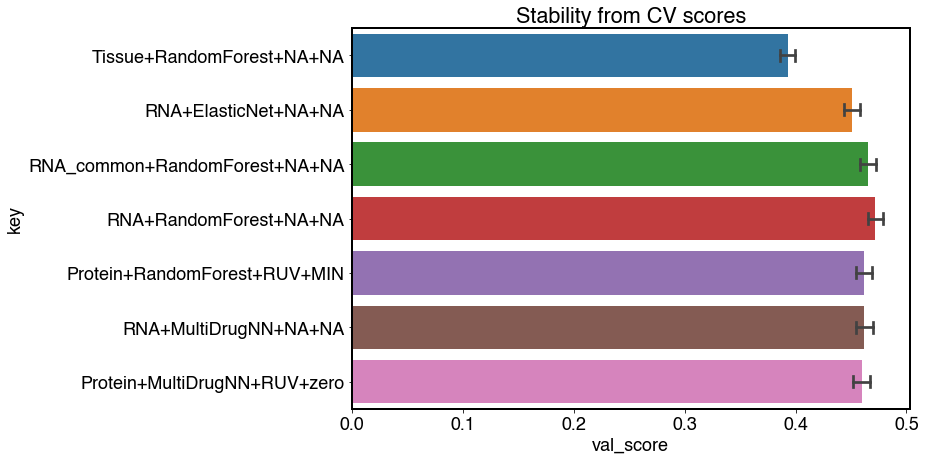

In [121]:
plt.figure(figsize=(10, 7))
sns.barplot(x='val_score', y='key', data=val_corr_df_included, capsize=.2)
plt.title("Stability from CV scores")

#### SEM 900

In [193]:
val_corr_df_included.groupby(['key', 'Drug Id']).agg(
    np.std)['val_score'].reset_index().groupby(['key'])['val_score'].mean().sort_values()

key
RNA+ElasticNet+NA+NA             0.060980
RNA_common+RandomForest+NA+NA    0.061407
RNA+MultiDrugNN+NA+NA            0.061614
Protein+MultiDrugNN+RUV+zero     0.062270
Protein+RandomForest+RUV+MIN     0.062755
Tissue+RandomForest+NA+NA        0.064654
RNA+RandomForest+NA+NA           0.066860
Name: val_score, dtype: float64

In [194]:
# val900_stderr_df = (val_corr_df_included.groupby(['key', 'Drug Id']).agg(
#     np.std)['val_score'].reset_index().groupby(['key'])['val_score'].mean() /
#                     np.sqrt(5)).sort_values().reset_index().rename(
#                         columns={'val_score': 'CV std-err'})

Text(0.5, 1.0, 'Model stability (212 drugs)')

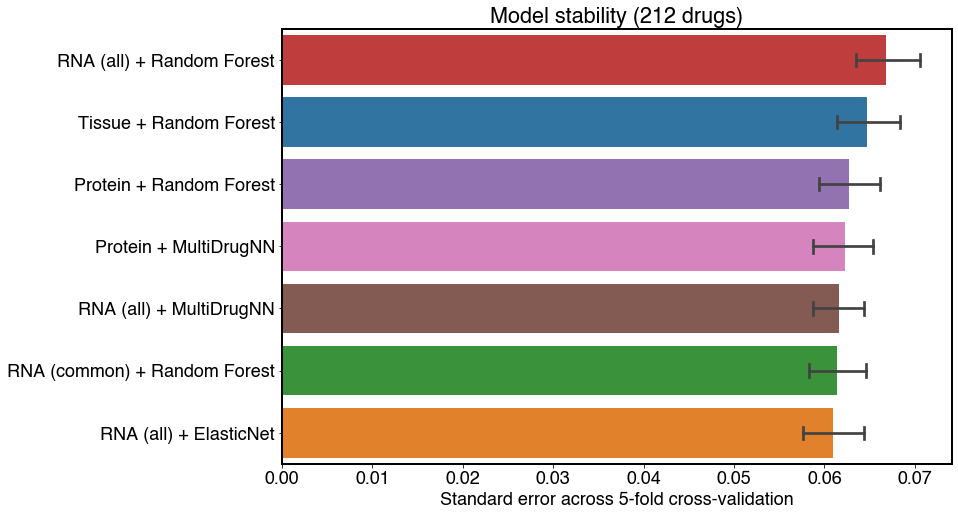

In [195]:
val900_stderr_df = val_corr_df_included.groupby(['key', 'Drug Id']).agg(
    np.std)['val_score'].reset_index()

order900 = val_corr_df_included.groupby(['key', 'Drug Id']).agg(
    np.std)['val_score'].reset_index().groupby(
        ['key'])['val_score'].mean().sort_values(ascending=False).index.values

plt.figure(figsize=(12, 8))
g = sns.barplot(y='key',
            x='val_score',
            data=val900_stderr_df,
            capsize=.2,
            hue='key',
            order=order900,
            hue_order=hue_order,
            dodge=False)
labels = [
    'RNA (all) + Random Forest', 
    'Tissue + Random Forest', 
    'Protein + Random Forest',
    'Protein + MultiDrugNN',
    'RNA (all) + MultiDrugNN', 
    'RNA (common) + Random Forest', 
    'RNA (all) + ElasticNet'
]
plt.xlabel("Standard error across 5-fold cross-validation")
plt.ylabel("")
g.set_yticklabels(labels)

g.get_legend().remove()
plt.title("Model stability (212 drugs)")

In [87]:
plot_df = (val_corr_df_included.groupby(['key', 'Drug Id']).agg(
    np.std)['val_score'] / np.sqrt(5)).reset_index()
plot_df = plot_df.rename(columns={'val_score':'CV std-error'})

Text(0.5, 1.0, 'Test set correlation on 212 drugs')

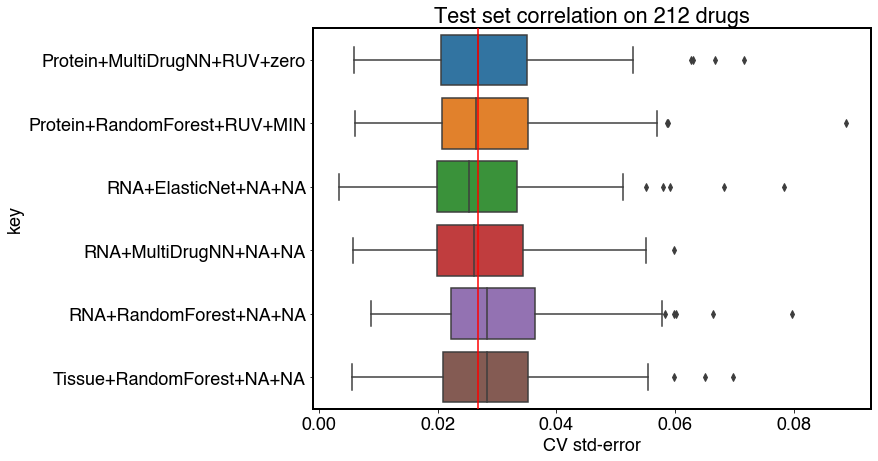

In [88]:
plt.figure(figsize=(10, 7))
ax = sns.boxplot('CV std-error',
                 'key',
                 data=plot_df,
                 orient='h',
                 showfliers=True)

x = plot_df[plot_df['key'] ==
                 'Protein+MultiDrugNN+RUV+zero']['CV std-error'].median()
plt.plot([x, x], [-0.5, 5.5], color='red', zorder=10)
plt.title("Test set correlation on 212 drugs")

#### min 300

In [89]:
val_corr_df_300 = val_corr_df[val_corr_df['min_cell_line']==300]

val_corr_df_included_300 = val_corr_df_300[val_corr_df_300['key'].isin(model_included)]

Text(0.5, 1.0, 'Stability from CV scores (446 drugs)')

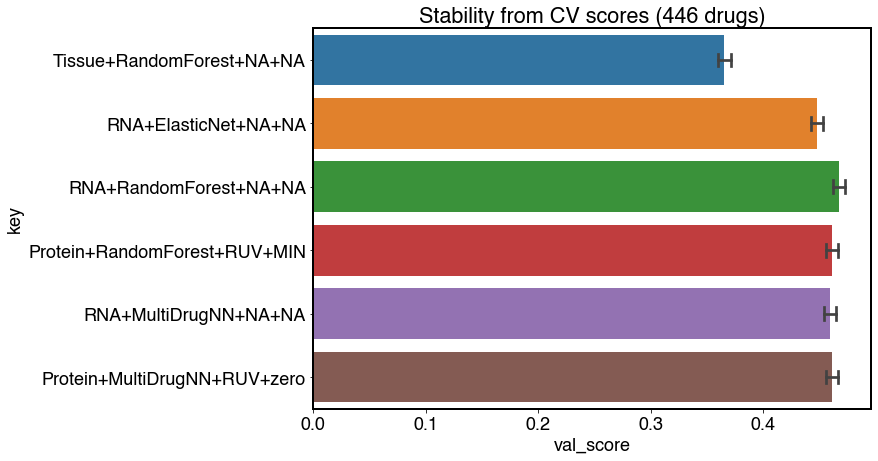

In [90]:
plt.figure(figsize=(10,7))
sns.barplot(x='val_score',y='key', data=val_corr_df_included_300, capsize=.2)
plt.title("Stability from CV scores (446 drugs)")

#### SEM 300

In [91]:
val_corr_df_included_300.groupby(['key', 'Drug Id']).agg(
    np.std)['val_score'].reset_index().groupby(['key'])['val_score'].mean().reset_index()

key  val_score
0  Protein+MultiDrugNN+RUV+zero   0.064416
1  Protein+RandomForest+RUV+MIN   0.068183
2          RNA+ElasticNet+NA+NA   0.065235
3         RNA+MultiDrugNN+NA+NA   0.062455
4        RNA+RandomForest+NA+NA   0.070906
5     Tissue+RandomForest+NA+NA   0.074289

In [92]:
(val_corr_df_included_300.groupby(['key', 'Drug Id']).agg(
    np.std)['val_score'].reset_index().groupby(['key'])['val_score'].mean() / np.sqrt(5)).sort_values().reset_index()

key  val_score
0         RNA+MultiDrugNN+NA+NA   0.027931
1  Protein+MultiDrugNN+RUV+zero   0.028808
2          RNA+ElasticNet+NA+NA   0.029174
3  Protein+RandomForest+RUV+MIN   0.030492
4        RNA+RandomForest+NA+NA   0.031710
5     Tissue+RandomForest+NA+NA   0.033223

In [ ]:
val300_stderr_df = (val_corr_df_included.groupby(['key', 'Drug Id']).agg(
    np.std)['val_score'].reset_index().groupby(['key'])['val_score'].mean() /
                    np.sqrt(5)).sort_values().reset_index().rename(
                        columns={'val_score': 'CV std-err'})

plt.figure(figsize=(10, 7))
g = sns.barplot(y=val300_stderr_df['key'],
            x=val300_stderr_df['CV std-err'],
            hue=val300_stderr_df['key'], hue_order = val900_stderr_df['key'],
            dodge=False)
plt.title("Standard error across 5-fold CV (446 drugs)")
g.get_legend().remove()


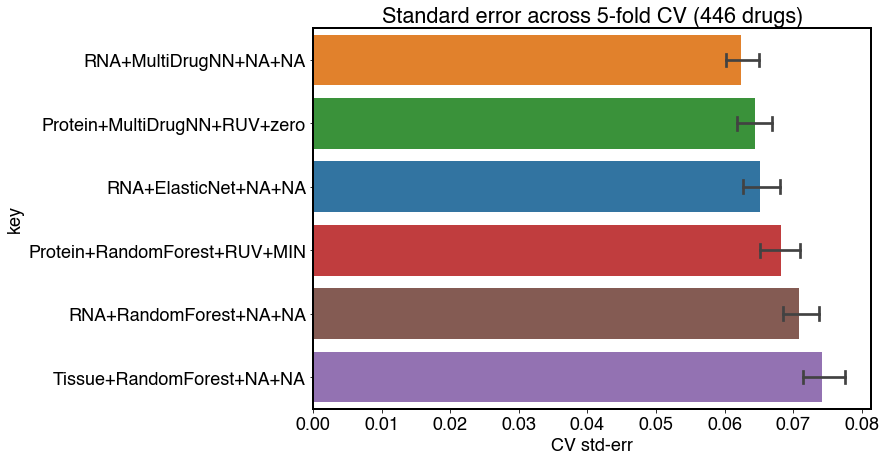

In [94]:
val300_stderr_df = val_corr_df_included_300.groupby(['key', 'Drug Id']).agg(
    np.std)['val_score'].reset_index()
order300 = val_corr_df_included_300.groupby(['key', 'Drug Id']).agg(
    np.std)['val_score'].reset_index().groupby(
        ['key'])['val_score'].mean().sort_values().index.values
plt.figure(figsize=(10, 7))
g = sns.barplot(y='key',
            x='val_score',
            data=val300_stderr_df,
            capsize=.2,
            order = order300,
            hue = 'key',
            hue_order = order900,
            dodge=False)
plt.xlabel("CV std-err")
plt.title("Standard error across 5-fold CV (446 drugs)")
g.get_legend().remove()


#### combined

### protein improvement

In [49]:
drug_meta = pd.read_csv("../data/drug/screened_compunds_rel_8.2.csv")

#### RF

In [50]:
val_corr_df_900 = val_corr_df[val_corr_df['min_cell_line']==900]

val_corr_df_included = val_corr_df_900[val_corr_df_900['key'].isin(model_included)]

In [51]:
val_corr_df_included_RNA = val_corr_df_included[val_corr_df_included['key']=='RNA+RandomForest+NA+NA']
val_corr_df_included_Protein = val_corr_df_included[val_corr_df_included['key']=='Protein+RandomForest+RUV+MIN']

In [52]:
res_df = []
for drug in val_corr_df_included_RNA['Drug Id'].unique():
    tmp_rna = val_corr_df_included_RNA[val_corr_df_included_RNA['Drug Id'] ==
                                       drug]['val_score']
    tmp_protein = val_corr_df_included_Protein[
        val_corr_df_included_Protein['Drug Id'] == drug]['val_score']
    res_df.append({
        'Drug Id': drug,
        'RNA_mean': tmp_rna.mean(),
        'Protein_mean': tmp_protein.mean(),
        'pval': ttest_rel(tmp_rna.values, tmp_protein.values)[1]
    })
res_df = pd.DataFrame(res_df).sort_values(by=['pval'])

In [53]:
res_df

Drug Id  RNA_mean  Protein_mean      pval
189     1230  0.249063      0.203115  0.019685
210     1498  0.659945      0.617514  0.044951
115      474  0.468254      0.398669  0.065152
82       344  0.495374      0.437011  0.066201
47       284  0.259333      0.194559  0.071135
..       ...       ...           ...       ...
1        179  0.547704      0.548066  0.990928
130     1007  0.469479      0.469870  0.991731
184     1192  0.421449      0.421800  0.992338
75       329  0.555215      0.554784  0.992386
49       286  0.594492      0.594289  0.993101

[212 rows x 4 columns]

#### MultiDrugNN

##### min 900

In [105]:
val_corr_df_900 = val_corr_df[val_corr_df['min_cell_line']==900]

val_corr_df_included = val_corr_df_900[val_corr_df_900['key'].isin(model_included)]

In [106]:
val_corr_df_included_RNA = val_corr_df_included[val_corr_df_included['key']=='RNA+MultiDrugNN+NA+NA']
val_corr_df_included_Protein = val_corr_df_included[val_corr_df_included['key']=='Protein+MultiDrugNN+RUV+zero']

In [107]:
test_corr_df_included = test_corr_df_900[test_corr_df_900['key'].isin(model_included)]

In [108]:
test_corr_df_included_RNA = test_corr_df_included[test_corr_df_included['key']=='RNA+MultiDrugNN+NA+NA']
test_corr_df_included_Protein = test_corr_df_included[test_corr_df_included['key']=='Protein+MultiDrugNN+RUV+zero']
test_corr_df_included_RNA = test_corr_df_included_RNA.rename(columns={'test_corr':'val_score'})
test_corr_df_included_Protein = test_corr_df_included_Protein.rename(columns={'test_corr':'val_score'})

In [109]:
val_corr_df_included_RNA = pd.concat([val_corr_df_included_RNA,test_corr_df_included_RNA])
val_corr_df_included_Protein = pd.concat([val_corr_df_included_Protein, test_corr_df_included_Protein])

In [110]:
val_corr_df_included_RNA.head()

Drug Id   run  val_score        model data  min_cell_line normalisation  \
0      152  cv_0   0.559269  MultiDrugNN  RNA            900            NA   
1      179  cv_0   0.506630  MultiDrugNN  RNA            900            NA   
2      193  cv_0   0.256233  MultiDrugNN  RNA            900            NA   
3      196  cv_0   0.486132  MultiDrugNN  RNA            900            NA   
4      203  cv_0   0.506956  MultiDrugNN  RNA            900            NA   

  imputation                    key  
0         NA  RNA+MultiDrugNN+NA+NA  
1         NA  RNA+MultiDrugNN+NA+NA  
2         NA  RNA+MultiDrugNN+NA+NA  
3         NA  RNA+MultiDrugNN+NA+NA  
4         NA  RNA+MultiDrugNN+NA+NA

In [111]:
test_corr_df_included_RNA

Drug Id  val_score        model data  min_cell_line normalisation  \
0        152   0.431025  MultiDrugNN  RNA            900            NA   
1        179   0.618610  MultiDrugNN  RNA            900            NA   
2        193   0.383561  MultiDrugNN  RNA            900            NA   
3        196   0.486473  MultiDrugNN  RNA            900            NA   
4        203   0.533713  MultiDrugNN  RNA            900            NA   
..       ...        ...          ...  ...            ...           ...   
207     1378   0.640201  MultiDrugNN  RNA            900            NA   
208     1494   0.608362  MultiDrugNN  RNA            900            NA   
209     1495   0.527445  MultiDrugNN  RNA            900            NA   
210     1498   0.594386  MultiDrugNN  RNA            900            NA   
211     1529   0.627564  MultiDrugNN  RNA            900            NA   

    imputation                    key  
0           NA  RNA+MultiDrugNN+NA+NA  
1           NA  RNA+MultiDrugNN+NA+NA  
2           NA  RNA+MultiDrugNN+NA+NA  
3           NA  RNA+MultiDrugNN+NA+NA  
4           NA  RNA+MultiDrugNN+NA+NA  
..         ...                    ...  
207         NA  RNA+MultiDrugNN+NA+NA  
208         NA  RNA+MultiDrugNN+NA+NA  
209         NA  RNA+MultiDrugNN+NA+NA  
210         NA  RNA+MultiDrugNN+NA+NA  
211         NA  RNA+MultiDrugNN+NA+NA  

[212 rows x 8 columns]

In [112]:
res_df = []
for drug in val_corr_df_included_RNA['Drug Id'].unique():
    tmp_rna = val_corr_df_included_RNA[val_corr_df_included_RNA['Drug Id'] ==
                                       drug]['val_score']
    tmp_protein = val_corr_df_included_Protein[
        val_corr_df_included_Protein['Drug Id'] == drug]['val_score']
    res_df.append({
        'Drug Id': drug,
        'RNA_performance': tmp_rna.mean(),
        'Protein_performance': tmp_protein.mean(),
        'pval': ttest_rel(tmp_rna.values, tmp_protein.values)[1]
    })
res_df = pd.DataFrame(res_df).sort_values(by=['pval'])

In [113]:
res_df['category'] = res_df.apply(lambda row: 'protein better' if row[
    'Protein_performance'] - row['RNA_performance'] > 0 else 'RNA better', axis=1)

In [103]:
res_df[res_df['pval']<0.05]

Drug Id  RNA_performance  Protein_performance      pval        category
2        193         0.295412             0.392432  0.002392  protein better
191     1239         0.555720             0.580701  0.002820  protein better
198     1262         0.447174             0.502328  0.003777  protein better
127     1004         0.584467             0.620181  0.006287  protein better
147     1024         0.487168             0.519805  0.008737  protein better
203     1372         0.673915             0.642316  0.009925      RNA better
186     1199         0.465326             0.517146  0.011464  protein better
196     1259         0.543138             0.495252  0.013046      RNA better
37       269         0.360107             0.409606  0.013052  protein better
89       374         0.471422             0.389147  0.018448      RNA better
169     1057         0.326972             0.423873  0.019432  protein better
12       223         0.457688             0.394720  0.019537      RNA better
158     1039         0.361650             0.424345  0.020282  protein better
46       283         0.435992             0.382569  0.020777      RNA better
133     1010         0.489361             0.458586  0.027565      RNA better
111      442         0.455335             0.396461  0.027891      RNA better
210     1498         0.665387             0.636590  0.029444      RNA better
44       281         0.471567             0.374983  0.031475      RNA better
138     1015         0.539211             0.504043  0.031785      RNA better
194     1243         0.422583             0.485665  0.032420  protein better
23       252         0.554968             0.507702  0.032716      RNA better
187     1218         0.424356             0.468650  0.033881  protein better
82       344         0.501985             0.436500  0.034912      RNA better
53       290         0.583378             0.616620  0.035058  protein better
195     1248         0.576382             0.602330  0.036451  protein better
184     1192         0.401722             0.455150  0.038684  protein better
137     1014         0.669911             0.637731  0.042319      RNA better
45       282         0.460096             0.416438  0.044987      RNA better

In [157]:
res = pd.merge(res_df[res_df['pval'] < 0.05],
         drug_meta,
         left_on=['Drug Id'],
         right_on=['DRUG_ID']).drop(
             ['DRUG_ID'],
             axis=1).sort_values(by=['FDA_Approved', 'Protein_performance'], ascending=False)


In [68]:
res_df[res_df['Drug Id']==1114]

Empty DataFrame
Columns: [Drug Id, RNA_performance, Protein_performance, pval, category]
Index: []

In [159]:
res.to_excel("../data/drug/protein_improvement_drugs.xlsx", index=False)

##### min 300

In [124]:
val_corr_df_300 = val_corr_df[val_corr_df['min_cell_line']==300]

val_corr_df_included = val_corr_df_300[val_corr_df_300['key'].isin(model_included)]

In [125]:
val_corr_df_included_RNA = val_corr_df_included[val_corr_df_included['key']=='RNA+MultiDrugNN+NA+NA']
val_corr_df_included_Protein = val_corr_df_included[val_corr_df_included['key']=='Protein+MultiDrugNN+RUV+zero']

In [126]:
test_corr_df_included = test_corr_df_300[test_corr_df_300['key'].isin(model_included)]

In [127]:
test_corr_df_included_RNA = test_corr_df_included[test_corr_df_included['key']=='RNA+MultiDrugNN+NA+NA']
test_corr_df_included_Protein = test_corr_df_included[test_corr_df_included['key']=='Protein+MultiDrugNN+RUV+zero']
test_corr_df_included_RNA = test_corr_df_included_RNA.rename(columns={'test_corr':'val_score'})
test_corr_df_included_Protein = test_corr_df_included_Protein.rename(columns={'test_corr':'val_score'})

In [128]:
val_corr_df_included_RNA = pd.concat([val_corr_df_included_RNA,test_corr_df_included_RNA])
val_corr_df_included_Protein = pd.concat([val_corr_df_included_Protein, test_corr_df_included_Protein])

In [129]:
val_corr_df_included_RNA.head()

Drug Id   run  val_score        model data  min_cell_line normalisation  \
0        1  cv_0   0.314897  MultiDrugNN  RNA            300            NA   
1        3  cv_0   0.329207  MultiDrugNN  RNA            300            NA   
2        5  cv_0   0.403185  MultiDrugNN  RNA            300            NA   
3        6  cv_0   0.380418  MultiDrugNN  RNA            300            NA   
4        9  cv_0   0.275058  MultiDrugNN  RNA            300            NA   

  imputation                    key  
0         NA  RNA+MultiDrugNN+NA+NA  
1         NA  RNA+MultiDrugNN+NA+NA  
2         NA  RNA+MultiDrugNN+NA+NA  
3         NA  RNA+MultiDrugNN+NA+NA  
4         NA  RNA+MultiDrugNN+NA+NA

In [130]:
test_corr_df_included_RNA

Drug Id  val_score        model data  min_cell_line normalisation  \
0          1   0.426266  MultiDrugNN  RNA            300            NA   
1          3   0.406793  MultiDrugNN  RNA            300            NA   
2          5   0.597769  MultiDrugNN  RNA            300            NA   
3          6   0.120561  MultiDrugNN  RNA            300            NA   
4          9   0.271850  MultiDrugNN  RNA            300            NA   
..       ...        ...          ...  ...            ...           ...   
441     2107   0.663121  MultiDrugNN  RNA            300            NA   
442     2109   0.367215  MultiDrugNN  RNA            300            NA   
443     2110   0.532072  MultiDrugNN  RNA            300            NA   
444     2111   0.731025  MultiDrugNN  RNA            300            NA   
445     2170   0.531011  MultiDrugNN  RNA            300            NA   

    imputation                    key  
0           NA  RNA+MultiDrugNN+NA+NA  
1           NA  RNA+MultiDrugNN+NA+NA  
2           NA  RNA+MultiDrugNN+NA+NA  
3           NA  RNA+MultiDrugNN+NA+NA  
4           NA  RNA+MultiDrugNN+NA+NA  
..         ...                    ...  
441         NA  RNA+MultiDrugNN+NA+NA  
442         NA  RNA+MultiDrugNN+NA+NA  
443         NA  RNA+MultiDrugNN+NA+NA  
444         NA  RNA+MultiDrugNN+NA+NA  
445         NA  RNA+MultiDrugNN+NA+NA  

[446 rows x 8 columns]

In [131]:
res_df = []
for drug in val_corr_df_included_RNA['Drug Id'].unique():
    tmp_rna = val_corr_df_included_RNA[val_corr_df_included_RNA['Drug Id'] ==
                                       drug]['val_score']
    tmp_protein = val_corr_df_included_Protein[
        val_corr_df_included_Protein['Drug Id'] == drug]['val_score']
    res_df.append({
        'Drug Id': drug,
        'RNA_performance': tmp_rna.mean(),
        'Protein_performance': tmp_protein.mean(),
        'pval': ttest_rel(tmp_rna.values, tmp_protein.values)[1]
    })
res_df = pd.DataFrame(res_df).sort_values(by=['pval'])

In [132]:
res_df['category'] = res_df.apply(lambda row: 'protein better' if row[
    'Protein_performance'] - row['RNA_performance'] > 0 else 'RNA better', axis=1)

In [83]:
res_df[res_df['pval']<0.05]

Drug Id  RNA_performance  Protein_performance      pval        category
137      285         0.429139             0.407535  0.000530      RNA better
99       226         0.572230             0.532653  0.001455      RNA better
248     1032         0.436252             0.459568  0.001805  protein better
107      245         0.455742             0.514158  0.002507  protein better
221     1004         0.580818             0.626935  0.002748  protein better
372     1629         0.573163             0.608040  0.002859  protein better
199      436         0.414762             0.336608  0.002927      RNA better
124      269         0.364716             0.423454  0.003129  protein better
193      416         0.500614             0.533977  0.004418  protein better
383     1808         0.583587             0.532663  0.007739      RNA better
318     1243         0.398195             0.479763  0.008912  protein better
179      372         0.389354             0.335860  0.011109      RNA better
162      326         0.541059             0.514880  0.011880      RNA better
265     1057         0.347462             0.421443  0.012789  protein better
189      409         0.490546             0.540163  0.012976  protein better
135      283         0.437951             0.393127  0.016599      RNA better
343     1526         0.700585             0.666639  0.018133      RNA better
419     1927         0.505583             0.546257  0.020195  protein better
171      344         0.506297             0.442842  0.022076      RNA better
255     1043         0.266929             0.232571  0.023383      RNA better
376     1635         0.554034             0.591173  0.025375  protein better
96       223         0.450202             0.408499  0.025466      RNA better
58       164         0.327510             0.258569  0.025533      RNA better
232     1015         0.541854             0.507957  0.027186      RNA better
231     1014         0.669542             0.631886  0.027808      RNA better
322     1259         0.542022             0.503681  0.027900      RNA better
134      282         0.461891             0.414747  0.029043      RNA better
314     1237         0.626475             0.661644  0.029246  protein better
427     1940         0.220864             0.309249  0.030418  protein better
341     1511         0.556654             0.606750  0.031052  protein better
304     1191         0.392665             0.495887  0.031246  protein better
429     1996         0.501565             0.558817  0.031403  protein better
181      375         0.337940             0.369985  0.031774  protein better
407     1911         0.564707             0.610212  0.032123  protein better
302     1180         0.506135             0.524125  0.032574  protein better
425     1936         0.389932             0.452879  0.033230  protein better
442     2109         0.396938             0.432990  0.033530  protein better
235     1018         0.372702             0.408456  0.033800  protein better
437     2047         0.464074             0.544766  0.033995  protein better
313     1236         0.388149             0.451335  0.034519  protein better
141      289         0.302547             0.340214  0.035302  protein better
154      304         0.423967             0.473339  0.035811  protein better
282     1088         0.648107             0.611703  0.036954      RNA better
367     1622         0.559910             0.597792  0.037737  protein better
158      309         0.502249             0.532015  0.039439  protein better
326     1264         0.283959             0.347843  0.039629  protein better
63       171         0.263538             0.339276  0.040286  protein better
375     1634         0.594930             0.631124  0.041575  protein better
354     1563         0.649226             0.661972  0.041733  protein better
278     1080         0.585597             0.609250  0.042531  protein better
188      408         0.426324             0.506157  0.042766  protein better
4

In [84]:
res = pd.merge(res_df[res_df['pval'] < 0.05],
         drug_meta,
         left_on=['Drug Id'],
         right_on=['DRUG_ID']).drop(
             ['DRUG_ID'],
             axis=1).sort_values(by=['FDA_Approved', 'Protein_performance'], ascending=False)


In [68]:
res_df[res_df['Drug Id']==1114]

Empty DataFrame
Columns: [Drug Id, RNA_performance, Protein_performance, pval, category]
Index: []

In [92]:
res[res['TARGET_PATHWAY']=='Mitosis']

Drug Id  RNA_performance  Protein_performance      pval        category  \
4      1004         0.580818             0.626935  0.002748  protein better   
49     1080         0.585597             0.609250  0.042531  protein better   
1       226         0.572230             0.532653  0.001455      RNA better   

   SCREENING_SITE    DRUG_NAME  \
4          SANGER  Vinblastine   
49         SANGER   Paclitaxel   
1             MGH   GSK1070916   

                                             SYNONYMS  \
4                                              Velban   
49  BMS-181339-01, Taxol, Onxol, Paxene, Praxel, A...   
1                                         GSK-1070916   

                      TARGET TARGET_PATHWAY         Drug_Type  FDA_Approved  
4   Microtubule destabiliser        Mitosis  Chemotherapeutic           Yes  
49    Microtubule stabiliser        Mitosis  Chemotherapeutic           Yes  
1               AURKA, AURKC        Mitosis          Targeted  NotConfirmed

In [93]:
res.to_excel("../data/drug/protein_improvement_drugs_446drugs.xlsx", index=False)